In [1]:
# This R environment comes with all of CRAN preinstalled, as well as many other helpful packages
# The environment is defined by the kaggle/rstats docker image: https://github.com/kaggle/docker-rstats
# For example, here's several helpful packages to load in 

library(ggplot2) # Data visualization
library(readr) # CSV file I/O, e.g. the read_csv function
library(dplyr)
# Input data files are available in the "../input/" directory.
# For example, running this (by clicking run or pressing Shift+Enter) will list the files in the input directory

system("ls ../input")

# Any results you write to the current directory are saved as output.


Attaching package: ‘dplyr’

The following objects are masked from ‘package:stats’:

    filter, lag

The following objects are masked from ‘package:base’:

    intersect, setdiff, setequal, union



In [2]:
data = read.csv('../input/AmesHousing.txt', sep = '\t')

In [3]:
head(data)

Order PID       MS.SubClass MS.Zoning Lot.Frontage Lot.Area Street Alley
1 1     526301100 20          RL        141          31770    Pave   NA   
2 2     526350040 20          RH         80          11622    Pave   NA   
3 3     526351010 20          RL         81          14267    Pave   NA   
4 4     526353030 20          RL         93          11160    Pave   NA   
5 5     527105010 60          RL         74          13830    Pave   NA   
6 6     527105030 60          RL         78           9978    Pave   NA   
  Lot.Shape Land.Contour ⋯ Pool.Area Pool.QC Fence Misc.Feature Misc.Val
1 IR1       Lvl          ⋯ 0         NA      NA    NA               0   
2 Reg       Lvl          ⋯ 0         NA      MnPrv NA               0   
3 IR1       Lvl          ⋯ 0         NA      NA    Gar2         12500   
4 Reg       Lvl          ⋯ 0         NA      NA    NA               0   
5 IR1       Lvl          ⋯ 0         NA      MnPrv NA               0   
6 IR1       Lvl          ⋯ 0         NA      NA    NA               0   
  Mo.Sold Yr.Sold Sale.Type Sale.Condition SalePrice
1 5       2010    WD        Normal         215000   
2 6       2010    WD        Normal         105000   
3 6       2010    WD        Normal         172000   
4 4       2010    WD        Normal         244000   
5 3       2010    WD        Normal         189900   
6 6       2010    WD        Normal         195500

In [4]:
colnames(data)

[1] "Order"           "PID"             "MS.SubClass"     "MS.Zoning"      
 [5] "Lot.Frontage"    "Lot.Area"        "Street"          "Alley"          
 [9] "Lot.Shape"       "Land.Contour"    "Utilities"       "Lot.Config"     
[13] "Land.Slope"      "Neighborhood"    "Condition.1"     "Condition.2"    
[17] "Bldg.Type"       "House.Style"     "Overall.Qual"    "Overall.Cond"   
[21] "Year.Built"      "Year.Remod.Add"  "Roof.Style"      "Roof.Matl"      
[25] "Exterior.1st"    "Exterior.2nd"    "Mas.Vnr.Type"    "Mas.Vnr.Area"   
[29] "Exter.Qual"      "Exter.Cond"      "Foundation"      "Bsmt.Qual"      
[33] "Bsmt.Cond"       "Bsmt.Exposure"   "BsmtFin.Type.1"  "BsmtFin.SF.1"   
[37] "BsmtFin.Type.2"  "BsmtFin.SF.2"    "Bsmt.Unf.SF"     "Total.Bsmt.SF"  
[41] "Heating"         "Heating.QC"      "Central.Air"     "Electrical"     
[45] "X1st.Flr.SF"     "X2nd.Flr.SF"     "Low.Qual.Fin.SF" "Gr.Liv.Area"    
[49] "Bsmt.Full.Bath"  "Bsmt.Half.Bath"  "Full.Bath"       "Half.Bath"      
[53] "Bedroom.AbvGr"   "Kitchen.AbvGr"   "Kitchen.Qual"    "TotRms.AbvGrd"  
[57] "Functional"      "Fireplaces"      "Fireplace.Qu"    "Garage.Type"    
[61] "Garage.Yr.Blt"   "Garage.Finish"   "Garage.Cars"     "Garage.Area"    
[65] "Garage.Qual"     "Garage.Cond"     "Paved.Drive"     "Wood.Deck.SF"   
[69] "Open.Porch.SF"   "Enclosed.Porch"  "X3Ssn.Porch"     "Screen.Porch"   
[73] "Pool.Area"       "Pool.QC"         "Fence"           "Misc.Feature"   
[77] "Misc.Val"        "Mo.Sold"         "Yr.Sold"         "Sale.Type"      
[81] "Sale.Condition"  "SalePrice"

In [5]:
summary(data)

     Order             PID             MS.SubClass       MS.Zoning   
 Min.   :   1.0   Min.   :5.263e+08   Min.   : 20.00   A (agr):   2  
 1st Qu.: 733.2   1st Qu.:5.285e+08   1st Qu.: 20.00   C (all):  25  
 Median :1465.5   Median :5.355e+08   Median : 50.00   FV     : 139  
 Mean   :1465.5   Mean   :7.145e+08   Mean   : 57.39   I (all):   2  
 3rd Qu.:2197.8   3rd Qu.:9.072e+08   3rd Qu.: 70.00   RH     :  27  
 Max.   :2930.0   Max.   :1.007e+09   Max.   :190.00   RL     :2273  
                                                       RM     : 462  
  Lot.Frontage       Lot.Area       Street      Alley      Lot.Shape 
 Min.   : 21.00   Min.   :  1300   Grvl:  12   Grvl: 120   IR1: 979  
 1st Qu.: 58.00   1st Qu.:  7440   Pave:2918   Pave:  78   IR2:  76  
 Median : 68.00   Median :  9436               NA's:2732   IR3:  16  
 Mean   : 69.22   Mean   : 10148                           Reg:1859  
 3rd Qu.: 80.00   3rd Qu.: 11555                                     
 Max.   :313.00   Ma

We don't need the first two features.

In [6]:
data = data[c(-1,-2)]

In [7]:
head(data)

MS.SubClass MS.Zoning Lot.Frontage Lot.Area Street Alley Lot.Shape
1 20          RL        141          31770    Pave   NA    IR1      
2 20          RH         80          11622    Pave   NA    Reg      
3 20          RL         81          14267    Pave   NA    IR1      
4 20          RL         93          11160    Pave   NA    Reg      
5 60          RL         74          13830    Pave   NA    IR1      
6 60          RL         78           9978    Pave   NA    IR1      
  Land.Contour Utilities Lot.Config ⋯ Pool.Area Pool.QC Fence Misc.Feature
1 Lvl          AllPub    Corner     ⋯ 0         NA      NA    NA          
2 Lvl          AllPub    Inside     ⋯ 0         NA      MnPrv NA          
3 Lvl          AllPub    Corner     ⋯ 0         NA      NA    Gar2        
4 Lvl          AllPub    Corner     ⋯ 0         NA      NA    NA          
5 Lvl          AllPub    Inside     ⋯ 0         NA      MnPrv NA          
6 Lvl          AllPub    Inside     ⋯ 0         NA      NA    NA          
  Misc.Val Mo.Sold Yr.Sold Sale.Type Sale.Condition SalePrice
1     0    5       2010    WD        Normal         215000   
2     0    6       2010    WD        Normal         105000   
3 12500    6       2010    WD        Normal         172000   
4     0    4       2010    WD        Normal         244000   
5     0    3       2010    WD        Normal         189900   
6     0    6       2010    WD        Normal         195500

In [8]:
str(data)

'data.frame':	2930 obs. of  80 variables:
 $ MS.SubClass    : int  20 20 20 20 60 60 120 120 120 60 ...
 $ MS.Zoning      : Factor w/ 7 levels "A (agr)","C (all)",..: 6 5 6 6 6 6 6 6 6 6 ...
 $ Lot.Frontage   : int  141 80 81 93 74 78 41 43 39 60 ...
 $ Lot.Area       : int  31770 11622 14267 11160 13830 9978 4920 5005 5389 7500 ...
 $ Street         : Factor w/ 2 levels "Grvl","Pave": 2 2 2 2 2 2 2 2 2 2 ...
 $ Alley          : Factor w/ 2 levels "Grvl","Pave": NA NA NA NA NA NA NA NA NA NA ...
 $ Lot.Shape      : Factor w/ 4 levels "IR1","IR2","IR3",..: 1 4 1 4 1 1 4 1 1 4 ...
 $ Land.Contour   : Factor w/ 4 levels "Bnk","HLS","Low",..: 4 4 4 4 4 4 4 2 4 4 ...
 $ Utilities      : Factor w/ 3 levels "AllPub","NoSeWa",..: 1 1 1 1 1 1 1 1 1 1 ...
 $ Lot.Config     : Factor w/ 5 levels "Corner","CulDSac",..: 1 5 1 1 5 5 5 5 5 5 ...
 $ Land.Slope     : Factor w/ 3 levels "Gtl","Mod","Sev": 1 1 1 1 1 1 1 1 1 1 ...
 $ Neighborhood   : Factor w/ 28 levels "Blmngtn","Blueste",..: 16 16 16 16 

Outlier first
===

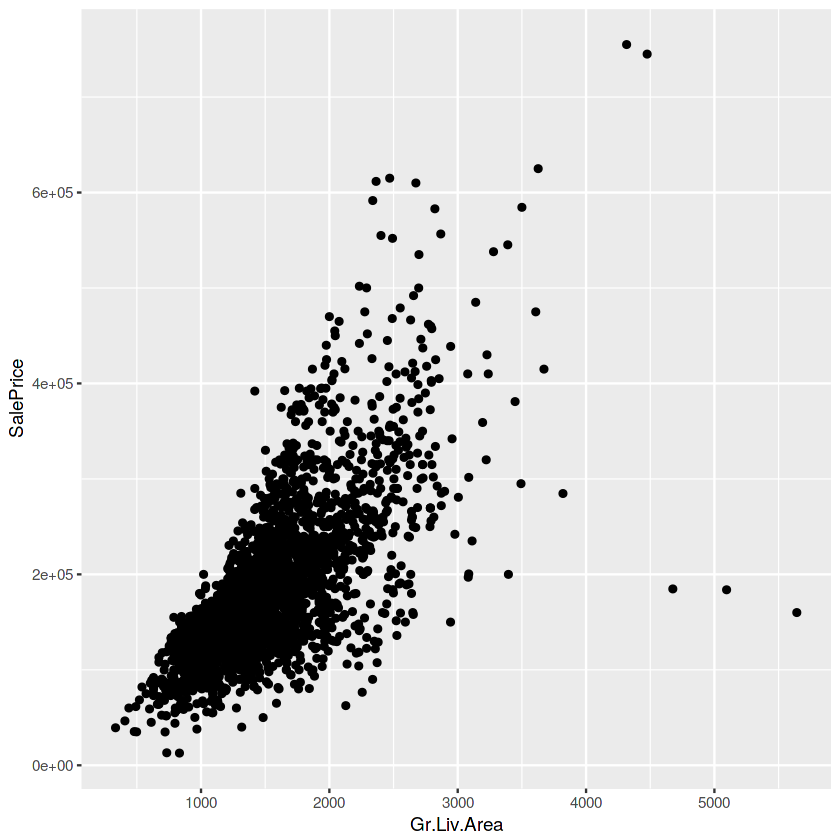

In [9]:
ggplot(data,aes(x = Gr.Liv.Area, y = SalePrice)) + geom_point()

Delete the bottom right three points which are so wired...

In [10]:
data = data[-c(which(data$Gr.Liv.Area > 4000 & data$SalePrice < 200000)),]

In [11]:
any(is.na(data))

[1] TRUE

In [12]:
any(is.na(data$SalePrice))

[1] FALSE

假如直接删除了缺失值：

In [13]:
ames = na.omit(data)
dim(ames)

[1]  0 80

看来不是简简单单去掉就可以解决的问题，那么在这里，我们可视化一下缺失值！！！！！
==

In [14]:
#我们只需要处理除了saleprice之外的数据的na。
x = as.data.frame(abs(is.na(data[-82])))
head(x)

MS.SubClass MS.Zoning Lot.Frontage Lot.Area Street Alley Lot.Shape
1 0           0         0            0        0      1     0        
2 0           0         0            0        0      1     0        
3 0           0         0            0        0      1     0        
4 0           0         0            0        0      1     0        
5 0           0         0            0        0      1     0        
6 0           0         0            0        0      1     0        
  Land.Contour Utilities Lot.Config ⋯ Pool.Area Pool.QC Fence Misc.Feature
1 0            0         0          ⋯ 0         1       1     1           
2 0            0         0          ⋯ 0         1       0     1           
3 0            0         0          ⋯ 0         1       1     0           
4 0            0         0          ⋯ 0         1       1     1           
5 0            0         0          ⋯ 0         1       0     1           
6 0            0         0          ⋯ 0         1       1     1           
  Misc.Val Mo.Sold Yr.Sold Sale.Type Sale.Condition SalePrice
1 0        0       0       0         0              0        
2 0        0       0       0         0              0        
3 0        0       0       0         0              0        
4 0        0       0       0         0              0        
5 0        0       0       0         0              0        
6 0        0       0       0         0              0

In [15]:
#计算一下每一个feature缺失了多少
na_data = as.data.frame(colSums(x))
colnames(na_data) = 'number'
na_data['feature'] = rownames(na_data)
na_data

number feature       
MS.SubClass       0   MS.SubClass   
MS.Zoning         0   MS.Zoning     
Lot.Frontage    490   Lot.Frontage  
Lot.Area          0   Lot.Area      
Street            0   Street        
Alley          2729   Alley         
Lot.Shape         0   Lot.Shape     
Land.Contour      0   Land.Contour  
Utilities         0   Utilities     
Lot.Config        0   Lot.Config    
Land.Slope        0   Land.Slope    
Neighborhood      0   Neighborhood  
Condition.1       0   Condition.1   
Condition.2       0   Condition.2   
Bldg.Type         0   Bldg.Type     
House.Style       0   House.Style   
Overall.Qual      0   Overall.Qual  
Overall.Cond      0   Overall.Cond  
Year.Built        0   Year.Built    
Year.Remod.Add    0   Year.Remod.Add
Roof.Style        0   Roof.Style    
Roof.Matl         0   Roof.Matl     
Exterior.1st      0   Exterior.1st  
Exterior.2nd      0   Exterior.2nd  
Mas.Vnr.Type      0   Mas.Vnr.Type  
Mas.Vnr.Area     23   Mas.Vnr.Area  
Exter.Qual        0   Exter.Qual    
Exter.Cond        0   Exter.Cond    
Foundation        0   Foundation    
Bsmt.Qual        79   Bsmt.Qual     
⋮              ⋮      ⋮             
Bedroom.AbvGr     0   Bedroom.AbvGr 
Kitchen.AbvGr     0   Kitchen.AbvGr 
Kitchen.Qual      0   Kitchen.Qual  
TotRms.AbvGrd     0   TotRms.AbvGrd 
Functional        0   Functional    
Fireplaces        0   Fireplaces    
Fireplace.Qu   1422   Fireplace.Qu  
Garage.Type     157   Garage.Type   
Garage.Yr.Blt   159   Garage.Yr.Blt 
Garage.Finish   157   Garage.Finish 
Garage.Cars       1   Garage.Cars   
Garage.Area       1   Garage.Area   
Garage.Qual     158   Garage.Qual   
Garage.Cond     158   Garage.Cond   
Paved.Drive       0   Paved.Drive   
Wood.Deck.SF      0   Wood.Deck.SF  
Open.Porch.SF     0   Open.Porch.SF 
Enclosed.Porch    0   Enclosed.Porch
X3Ssn.Porch       0   X3Ssn.Porch   
Screen.Porch      0   Screen.Porch  
Pool.Area         0   Pool.Area     
Pool.QC        2915   Pool.QC       
Fence          2355   Fence         
Misc.Feature   2822   Misc.Feature  
Misc.Val          0   Misc.Val      
Mo.Sold           0   Mo.Sold       
Yr.Sold           0   Yr.Sold       
Sale.Type         0   Sale.Type     
Sale.Condition    0   Sale.Condition
SalePrice         0   SalePrice

In [16]:
#把缺失数量不是0的选出来，并且排序，而且我们不能丢掉我们的rownames!!
na_data['feature'] = rownames(na_data)
na_data

number feature       
MS.SubClass       0   MS.SubClass   
MS.Zoning         0   MS.Zoning     
Lot.Frontage    490   Lot.Frontage  
Lot.Area          0   Lot.Area      
Street            0   Street        
Alley          2729   Alley         
Lot.Shape         0   Lot.Shape     
Land.Contour      0   Land.Contour  
Utilities         0   Utilities     
Lot.Config        0   Lot.Config    
Land.Slope        0   Land.Slope    
Neighborhood      0   Neighborhood  
Condition.1       0   Condition.1   
Condition.2       0   Condition.2   
Bldg.Type         0   Bldg.Type     
House.Style       0   House.Style   
Overall.Qual      0   Overall.Qual  
Overall.Cond      0   Overall.Cond  
Year.Built        0   Year.Built    
Year.Remod.Add    0   Year.Remod.Add
Roof.Style        0   Roof.Style    
Roof.Matl         0   Roof.Matl     
Exterior.1st      0   Exterior.1st  
Exterior.2nd      0   Exterior.2nd  
Mas.Vnr.Type      0   Mas.Vnr.Type  
Mas.Vnr.Area     23   Mas.Vnr.Area  
Exter.Qual        0   Exter.Qual    
Exter.Cond        0   Exter.Cond    
Foundation        0   Foundation    
Bsmt.Qual        79   Bsmt.Qual     
⋮              ⋮      ⋮             
Bedroom.AbvGr     0   Bedroom.AbvGr 
Kitchen.AbvGr     0   Kitchen.AbvGr 
Kitchen.Qual      0   Kitchen.Qual  
TotRms.AbvGrd     0   TotRms.AbvGrd 
Functional        0   Functional    
Fireplaces        0   Fireplaces    
Fireplace.Qu   1422   Fireplace.Qu  
Garage.Type     157   Garage.Type   
Garage.Yr.Blt   159   Garage.Yr.Blt 
Garage.Finish   157   Garage.Finish 
Garage.Cars       1   Garage.Cars   
Garage.Area       1   Garage.Area   
Garage.Qual     158   Garage.Qual   
Garage.Cond     158   Garage.Cond   
Paved.Drive       0   Paved.Drive   
Wood.Deck.SF      0   Wood.Deck.SF  
Open.Porch.SF     0   Open.Porch.SF 
Enclosed.Porch    0   Enclosed.Porch
X3Ssn.Porch       0   X3Ssn.Porch   
Screen.Porch      0   Screen.Porch  
Pool.Area         0   Pool.Area     
Pool.QC        2915   Pool.QC       
Fence          2355   Fence         
Misc.Feature   2822   Misc.Feature  
Misc.Val          0   Misc.Val      
Mo.Sold           0   Mo.Sold       
Yr.Sold           0   Yr.Sold       
Sale.Type         0   Sale.Type     
Sale.Condition    0   Sale.Condition
SalePrice         0   SalePrice

In [17]:
na_data.sorted = na_data[order(-na_data$number),]


In [18]:
na_data.sorted

number feature        
Pool.QC         2915   Pool.QC        
Misc.Feature    2822   Misc.Feature   
Alley           2729   Alley          
Fence           2355   Fence          
Fireplace.Qu    1422   Fireplace.Qu   
Lot.Frontage     490   Lot.Frontage   
Garage.Yr.Blt    159   Garage.Yr.Blt  
Garage.Qual      158   Garage.Qual    
Garage.Cond      158   Garage.Cond    
Garage.Type      157   Garage.Type    
Garage.Finish    157   Garage.Finish  
Bsmt.Qual         79   Bsmt.Qual      
Bsmt.Cond         79   Bsmt.Cond      
Bsmt.Exposure     79   Bsmt.Exposure  
BsmtFin.Type.1    79   BsmtFin.Type.1 
BsmtFin.Type.2    79   BsmtFin.Type.2 
Mas.Vnr.Area      23   Mas.Vnr.Area   
Bsmt.Full.Bath     2   Bsmt.Full.Bath 
Bsmt.Half.Bath     2   Bsmt.Half.Bath 
BsmtFin.SF.1       1   BsmtFin.SF.1   
BsmtFin.SF.2       1   BsmtFin.SF.2   
Bsmt.Unf.SF        1   Bsmt.Unf.SF    
Total.Bsmt.SF      1   Total.Bsmt.SF  
Garage.Cars        1   Garage.Cars    
Garage.Area        1   Garage.Area    
MS.SubClass        0   MS.SubClass    
MS.Zoning          0   MS.Zoning      
Lot.Area           0   Lot.Area       
Street             0   Street         
Lot.Shape          0   Lot.Shape      
⋮               ⋮      ⋮              
Foundation      0      Foundation     
Heating         0      Heating        
Heating.QC      0      Heating.QC     
Central.Air     0      Central.Air    
Electrical      0      Electrical     
X1st.Flr.SF     0      X1st.Flr.SF    
X2nd.Flr.SF     0      X2nd.Flr.SF    
Low.Qual.Fin.SF 0      Low.Qual.Fin.SF
Gr.Liv.Area     0      Gr.Liv.Area    
Full.Bath       0      Full.Bath      
Half.Bath       0      Half.Bath      
Bedroom.AbvGr   0      Bedroom.AbvGr  
Kitchen.AbvGr   0      Kitchen.AbvGr  
Kitchen.Qual    0      Kitchen.Qual   
TotRms.AbvGrd   0      TotRms.AbvGrd  
Functional      0      Functional     
Fireplaces      0      Fireplaces     
Paved.Drive     0      Paved.Drive    
Wood.Deck.SF    0      Wood.Deck.SF   
Open.Porch.SF   0      Open.Porch.SF  
Enclosed.Porch  0      Enclosed.Porch 
X3Ssn.Porch     0      X3Ssn.Porch    
Screen.Porch    0      Screen.Porch   
Pool.Area       0      Pool.Area      
Misc.Val        0      Misc.Val       
Mo.Sold         0      Mo.Sold        
Yr.Sold         0      Yr.Sold        
Sale.Type       0      Sale.Type      
Sale.Condition  0      Sale.Condition 
SalePrice       0      SalePrice

In [19]:
na_data.big = subset(na_data.sorted, na_data.sorted$number > 0)

In [20]:
na_data.big

number feature       
Pool.QC        2915   Pool.QC       
Misc.Feature   2822   Misc.Feature  
Alley          2729   Alley         
Fence          2355   Fence         
Fireplace.Qu   1422   Fireplace.Qu  
Lot.Frontage    490   Lot.Frontage  
Garage.Yr.Blt   159   Garage.Yr.Blt 
Garage.Qual     158   Garage.Qual   
Garage.Cond     158   Garage.Cond   
Garage.Type     157   Garage.Type   
Garage.Finish   157   Garage.Finish 
Bsmt.Qual        79   Bsmt.Qual     
Bsmt.Cond        79   Bsmt.Cond     
Bsmt.Exposure    79   Bsmt.Exposure 
BsmtFin.Type.1   79   BsmtFin.Type.1
BsmtFin.Type.2   79   BsmtFin.Type.2
Mas.Vnr.Area     23   Mas.Vnr.Area  
Bsmt.Full.Bath    2   Bsmt.Full.Bath
Bsmt.Half.Bath    2   Bsmt.Half.Bath
BsmtFin.SF.1      1   BsmtFin.SF.1  
BsmtFin.SF.2      1   BsmtFin.SF.2  
Bsmt.Unf.SF       1   Bsmt.Unf.SF   
Total.Bsmt.SF     1   Total.Bsmt.SF 
Garage.Cars       1   Garage.Cars   
Garage.Area       1   Garage.Area

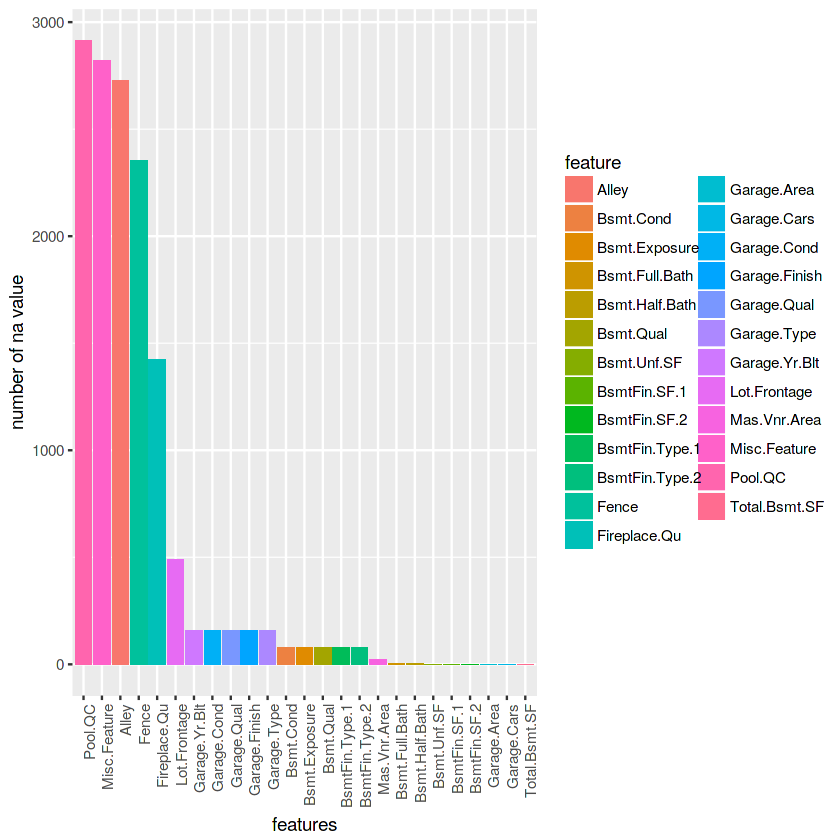

In [21]:
ggplot(data = na_data.big, aes(x = reorder(feature, -number, sum), y = number, fill = feature)) + geom_bar(stat = 'identity') + xlab('features') + ylab('number of na value') + theme(axis.text.x = element_text(angle = 90, hjust = 1))

For features like pool, misc, alley, fence and fireplace, 'NA' just means they don't have them, so we give the value 'None' to fill those 'NA'. And there are some "", empty string, we can assign it to NA or mode.
==

In [22]:
head(data)

MS.SubClass MS.Zoning Lot.Frontage Lot.Area Street Alley Lot.Shape
1 20          RL        141          31770    Pave   NA    IR1      
2 20          RH         80          11622    Pave   NA    Reg      
3 20          RL         81          14267    Pave   NA    IR1      
4 20          RL         93          11160    Pave   NA    Reg      
5 60          RL         74          13830    Pave   NA    IR1      
6 60          RL         78           9978    Pave   NA    IR1      
  Land.Contour Utilities Lot.Config ⋯ Pool.Area Pool.QC Fence Misc.Feature
1 Lvl          AllPub    Corner     ⋯ 0         NA      NA    NA          
2 Lvl          AllPub    Inside     ⋯ 0         NA      MnPrv NA          
3 Lvl          AllPub    Corner     ⋯ 0         NA      NA    Gar2        
4 Lvl          AllPub    Corner     ⋯ 0         NA      NA    NA          
5 Lvl          AllPub    Inside     ⋯ 0         NA      MnPrv NA          
6 Lvl          AllPub    Inside     ⋯ 0         NA      NA    NA          
  Misc.Val Mo.Sold Yr.Sold Sale.Type Sale.Condition SalePrice
1     0    5       2010    WD        Normal         215000   
2     0    6       2010    WD        Normal         105000   
3 12500    6       2010    WD        Normal         172000   
4     0    4       2010    WD        Normal         244000   
5     0    3       2010    WD        Normal         189900   
6     0    6       2010    WD        Normal         195500

Attention! We cannot add "None" directly, because we don't have "None" level for Pool.QC. So we need to add "None" level first.
==
Wrong: data[is.na(data$Pool.QC),"Pool.QC"] = "None"

Here is a list for empty string:

Mas.Vnr.Type 

Bsmt.Qual 

Bsmt.Cond 

Bsmt.Exposure 

Electrical 

Garage.Finish 

Garage.Qual 

Garage.Cond

In [23]:
levels = levels(data$Pool.QC)
levels[length(levels) + 1] = "None"
#refactor and replace NA with "None"
data$Pool.QC = factor(data$Pool.QC, levels = levels)
data[is.na(data$Pool.QC),"Pool.QC"] = "None"

Inorder to make this process faster, I created a function for the operation.
==

Fill_na = function(x, levels, y){
    levels[length(levels) + 1] = "None"
    x[y] = factor(x[y], levels = levels)
    x[is.na(x[y]),y] = "None"
    return(x)
}

But I failed....

Attention: levels function can't apply to data["feature x"], it only works on data$feature x

In [24]:
levels = levels(data$Alley)
levels[length(levels) + 1] = "None"
#refactor and replace NA with "None"
data$Alley = factor(data$Alley, levels = levels)
data[is.na(data$Alley),"Alley"] = "None"

levels = levels(data$Misc.Feature)
levels[length(levels) + 1] = "None"
#refactor and replace NA with "None"
data$Misc.Feature = factor(data$Misc.Feature, levels = levels)
data[is.na(data$Misc.Feature),"Misc.Feature"] = "None"

levels = levels(data$Fence)
levels[length(levels) + 1] = "None"
#refactor and replace NA with "None"
data$Fence = factor(data$Fence, levels = levels)
data[is.na(data$Fence),"Fence"] = "None"

levels = levels(data$Fireplace.Qu)
levels[length(levels) + 1] = "None"
#refactor and replace NA with "None"
data$Fireplace.Qu = factor(data$Fireplace.Qu, levels = levels)
data[is.na(data$Fireplace.Qu),"Fireplace.Qu"] = "None"

For Lot.Frontage，we impute them with the median value of their neighborhood.

In [25]:
median_lot = aggregate(data$Lot.Frontage, by = list(as.numeric(data$Neighborhood)), FUN = median, na.rm = T)

In [26]:
data[is.na(data$Lot.Frontage),"Lot.Frontage"] = median_lot[as.numeric(data[is.na(data$Lot.Frontage),"Neighborhood"]),][2]

In [27]:
summary(data$Lot.Frontage)

   Min. 1st Qu.  Median    Mean 3rd Qu.    Max.    NA's 
  21.00   60.00   70.00   69.34   80.00  313.00       3 

Since there are still 3 na values, we impute them with median.

In [28]:
data[is.na(data$Lot.Frontage),"Lot.Frontage"] = median(data$Lot.Frontage, na.rm = T)

For garage and basement, the NA simly means there is no garage or basement, so we just use None for them.

In [29]:
data$Garage.Finish[which(data$Garage.Finish == "")] = NA

In [30]:
data$Garage.Qual[which(data$Garage.Qual == "")] = NA

In [31]:
col_list= c("Garage.Cond","Bsmt.Qual","Bsmt.Cond","Bsmt.Exposure")
for (col in col_list){
    empty = which(data[,col] == "")
    data[,col][empty] = NA
}

In [32]:
levels = levels(data$Garage.Type)
levels[length(levels) + 1] = "None"
data$Garage.Type = factor(data$Garage.Type, levels = levels)
data[is.na(data$Garage.Type),"Garage.Type"] = "None"

levels = levels(data$Garage.Finish)

levels[length(levels) + 1] = "None"
data$Garage.Finish = factor(data$Garage.Finish, levels = levels)
data[is.na(data$Garage.Finish),"Garage.Finish"] = "None"

levels = levels(data$Garage.Qual)
levels[length(levels) + 1] = "N"
data$Garage.Qual = factor(data$Garage.Qual, levels = levels)
data[is.na(data$Garage.Qual),"Garage.Qual"] = "N"

levels = levels(data$Garage.Cond)
levels[length(levels) + 1] = "None"
data$Garage.Cond = factor(data$Garage.Cond, levels = levels)
data[is.na(data$Garage.Cond),"Garage.Cond"] = "None"

levels = levels(data$Bsmt.Qual)
levels[length(levels) + 1] = "None"
data$Bsmt.Qual = factor(data$Bsmt.Qual, levels = levels)
data[is.na(data$Bsmt.Qual),"Bsmt.Qual"] = "None"

levels = levels(data$Bsmt.Cond)
levels[length(levels) + 1] = "None"
data$Bsmt.Cond = factor(data$Bsmt.Cond, levels = levels)
data[is.na(data$Bsmt.Cond),"Bsmt.Cond"] = "None"

levels = levels(data$Bsmt.Exposure)
levels[length(levels) + 1] = "None"
data$Bsmt.Exposure = factor(data$Bsmt.Exposure, levels = levels)
data[is.na(data$Bsmt.Exposure),"Bsmt.Exposure"] = "None"

levels = levels(data$BsmtFin.Type.1)
levels[length(levels) + 1] = "None"
data$BsmtFin.Type.1 = factor(data$BsmtFin.Type.1, levels = levels)
data[is.na(data$BsmtFin.Type.1),"BsmtFin.Type.1"] = "None"

levels = levels(data$BsmtFin.Type.2)
levels[length(levels) + 1] = "None"
data$BsmtFin.Type.2 = factor(data$BsmtFin.Type.2, levels = levels)
data[is.na(data$BsmtFin.Type.2),"BsmtFin.Type.2"] = "None"

For garage year, we set to 0....Not so sure
For garage area, car, and lots of basement things  just 0!

In [33]:
colnames(data)

[1] "MS.SubClass"     "MS.Zoning"       "Lot.Frontage"    "Lot.Area"       
 [5] "Street"          "Alley"           "Lot.Shape"       "Land.Contour"   
 [9] "Utilities"       "Lot.Config"      "Land.Slope"      "Neighborhood"   
[13] "Condition.1"     "Condition.2"     "Bldg.Type"       "House.Style"    
[17] "Overall.Qual"    "Overall.Cond"    "Year.Built"      "Year.Remod.Add" 
[21] "Roof.Style"      "Roof.Matl"       "Exterior.1st"    "Exterior.2nd"   
[25] "Mas.Vnr.Type"    "Mas.Vnr.Area"    "Exter.Qual"      "Exter.Cond"     
[29] "Foundation"      "Bsmt.Qual"       "Bsmt.Cond"       "Bsmt.Exposure"  
[33] "BsmtFin.Type.1"  "BsmtFin.SF.1"    "BsmtFin.Type.2"  "BsmtFin.SF.2"   
[37] "Bsmt.Unf.SF"     "Total.Bsmt.SF"   "Heating"         "Heating.QC"     
[41] "Central.Air"     "Electrical"      "X1st.Flr.SF"     "X2nd.Flr.SF"    
[45] "Low.Qual.Fin.SF" "Gr.Liv.Area"     "Bsmt.Full.Bath"  "Bsmt.Half.Bath" 
[49] "Full.Bath"       "Half.Bath"       "Bedroom.AbvGr"   "Kitchen.AbvGr"  
[53] "Kitchen.Qual"    "TotRms.AbvGrd"   "Functional"      "Fireplaces"     
[57] "Fireplace.Qu"    "Garage.Type"     "Garage.Yr.Blt"   "Garage.Finish"  
[61] "Garage.Cars"     "Garage.Area"     "Garage.Qual"     "Garage.Cond"    
[65] "Paved.Drive"     "Wood.Deck.SF"    "Open.Porch.SF"   "Enclosed.Porch" 
[69] "X3Ssn.Porch"     "Screen.Porch"    "Pool.Area"       "Pool.QC"        
[73] "Fence"           "Misc.Feature"    "Misc.Val"        "Mo.Sold"        
[77] "Yr.Sold"         "Sale.Type"       "Sale.Condition"  "SalePrice"

In [34]:
for (col in c("Garage.Yr.Blt","Garage.Area","Garage.Cars",'BsmtFin.SF.1','BsmtFin.SF.2','Bsmt.Unf.SF','Total.Bsmt.SF','Bsmt.Full.Bath','Bsmt.Half.Bath','Mas.Vnr.Area')){
    data[is.na(data[col]),col] = 0
}

Mas.Vnr.Type's na can be None

In [35]:
data[is.na(data$Mas.Vnr.Type),"Mas.Vnr.Type"] = "None"
data$Mas.Vnr.Type[which(data$Mas.Vnr.Type == "")] = "None"

In [36]:
summary(data$Electrical)

FuseA FuseF FuseP   Mix SBrkr 
    1   188    50     8     1  2679

In [37]:
data$Electrical[which(data$Electrical == "")] = "SBrkr"
data$BsmtFin.Type.1[which(data$BsmtFin.Type.1 == "")] = "None"
data$BsmtFin.Type.2[which(data$BsmtFin.Type.2 == "")] = "None"

In [38]:
summary(data)

  MS.SubClass      MS.Zoning     Lot.Frontage       Lot.Area       Street    
 Min.   : 20.0   A (agr):   2   Min.   : 21.00   Min.   :  1300   Grvl:  12  
 1st Qu.: 20.0   C (all):  25   1st Qu.: 60.00   1st Qu.:  7439   Pave:2915  
 Median : 50.0   FV     : 139   Median : 70.00   Median :  9430              
 Mean   : 57.4   I (all):   2   Mean   : 69.34   Mean   : 10109              
 3rd Qu.: 70.0   RH     :  27   3rd Qu.: 80.00   3rd Qu.: 11523              
 Max.   :190.0   RL     :2270   Max.   :313.00   Max.   :215245              
                 RM     : 462                                                
  Alley      Lot.Shape  Land.Contour  Utilities      Lot.Config   Land.Slope
 Grvl: 120   IR1: 977   Bnk: 114     AllPub:2924   Corner : 510   Gtl:2786  
 Pave:  78   IR2:  76   HLS: 120     NoSeWa:   1   CulDSac: 180   Mod: 125  
 None:2729   IR3:  15   Low:  60     NoSewr:   2   FR2    :  85   Sev:  16  
             Reg:1859   Lvl:2633                   FR3    :  14     

In [39]:
any(is.na(data))

[1] FALSE

Now all data is clean!!!
====
Then we need to transform some features to be prepared for building models
==

In [40]:
num_features <- names(which(sapply(data, is.numeric)))
cat_features = names(which(sapply(data, is.factor)))
df.numeric <- data[num_features]
df.categorical = data[cat_features]

Now make factors to be nominal features and add them to df.numeric
===

In [41]:
# a function to show correlation between sale price and categorical features
group.prices <- function(col) {
   group.table <- data[,c(col, 'SalePrice', 'Overall.Qual')] %>%
    group_by_(col) %>%
    summarise(mean.Quality = round(mean(Overall.Qual),2),
      mean.Price = mean(SalePrice), n = n()) %>%
    arrange(mean.Quality)
    
  print(qplot(x=reorder(group.table[[col]], -group.table[['mean.Price']]), y=group.table[['mean.Price']]) +
    geom_bar(stat='identity', fill='cornflowerblue') +
    theme_minimal() +
    labs(x=col, y='Mean SalePrice') +
    theme(axis.text.x = element_text(angle = 45)))
  
  return(data.frame(group.table))
}    

In [42]:
head(df.categorical)

MS.Zoning Street Alley Lot.Shape Land.Contour Utilities Lot.Config Land.Slope
1 RL        Pave   None  IR1       Lvl          AllPub    Corner     Gtl       
2 RH        Pave   None  Reg       Lvl          AllPub    Inside     Gtl       
3 RL        Pave   None  IR1       Lvl          AllPub    Corner     Gtl       
4 RL        Pave   None  Reg       Lvl          AllPub    Corner     Gtl       
5 RL        Pave   None  IR1       Lvl          AllPub    Inside     Gtl       
6 RL        Pave   None  IR1       Lvl          AllPub    Inside     Gtl       
  Neighborhood Condition.1 ⋯ Garage.Type Garage.Finish Garage.Qual Garage.Cond
1 NAmes        Norm        ⋯ Attchd      Fin           TA          TA         
2 NAmes        Feedr       ⋯ Attchd      Unf           TA          TA         
3 NAmes        Norm        ⋯ Attchd      Unf           TA          TA         
4 NAmes        Norm        ⋯ Attchd      Fin           TA          TA         
5 Gilbert      Norm        ⋯ Attchd      Fin           TA          TA         
6 Gilbert      Norm        ⋯ Attchd      Fin           TA          TA         
  Paved.Drive Pool.QC Fence Misc.Feature Sale.Type Sale.Condition
1 P           None    None  None         WD        Normal        
2 Y           None    MnPrv None         WD        Normal        
3 Y           None    None  Gar2         WD        Normal        
4 Y           None    None  None         WD        Normal        
5 Y           None    MnPrv None         WD        Normal        
6 Y           None    None  None         WD        Normal

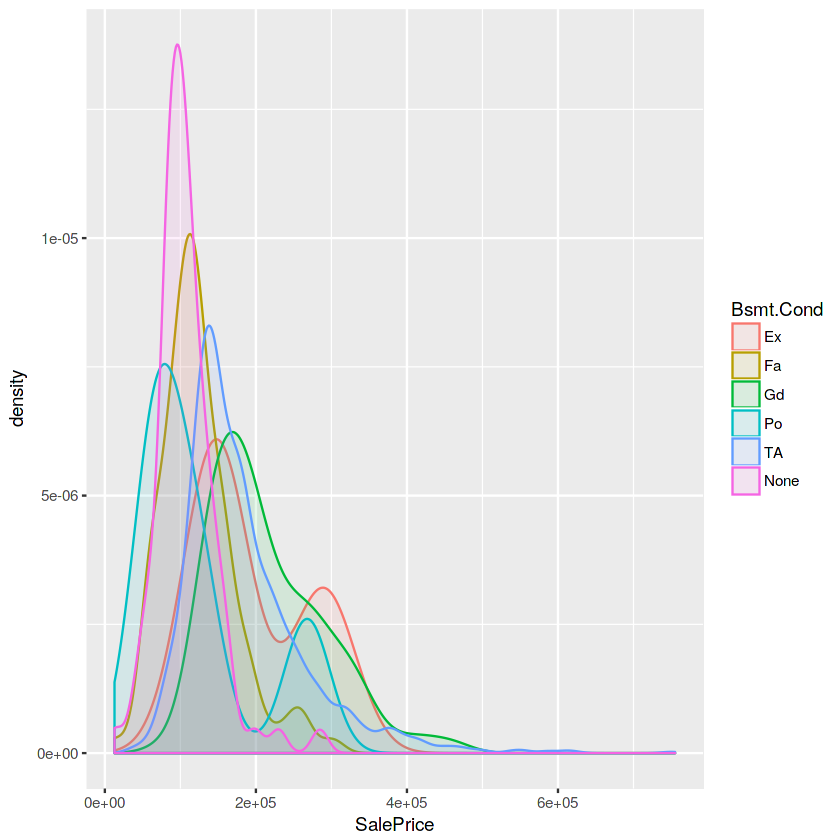

In [43]:
ggplot(data, aes(SalePrice, fill = Bsmt.Cond, colour = Bsmt.Cond)) +
  geom_density(alpha = 0.1)

In [44]:
# I think since most houses don't have pools....maybe we should get rid of it???
summary(data$Pool.QC)

Ex   Fa   Gd   TA None 
   4    2    3    3 2915

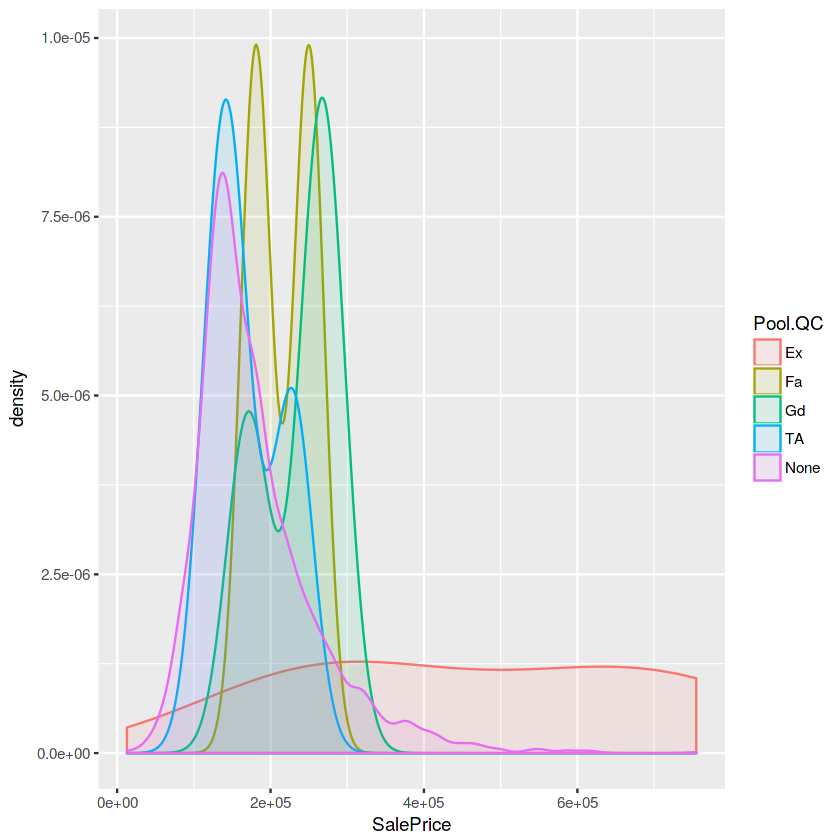

In [45]:
ggplot(data, aes(SalePrice, fill = Pool.QC, colour = Pool.QC)) +
  geom_density(alpha = 0.1)

In [46]:
map.fcn <- function(cols, map.list, df){
  for (col in cols){
    df[col] <- as.numeric(map.list[data[,col]])
  }
  return(df)
}

In [47]:
qual.list <- c('None' = 0, 'Po' = 1, 'Fa' = 2, 'TA' = 3, 'Gd' = 4, 'Ex' = 5)

In [48]:
qual.cols <- c('Exter.Qual', 'Exter.Cond', 'Garage.Qual', 'Garage.Cond', 'Fireplace.Qu', 'Kitchen.Qual', 'Heating.QC', 'Bsmt.Qual','Bsmt.Cond')

In [49]:
df.numeric <- map.fcn(qual.cols, qual.list, df.numeric)

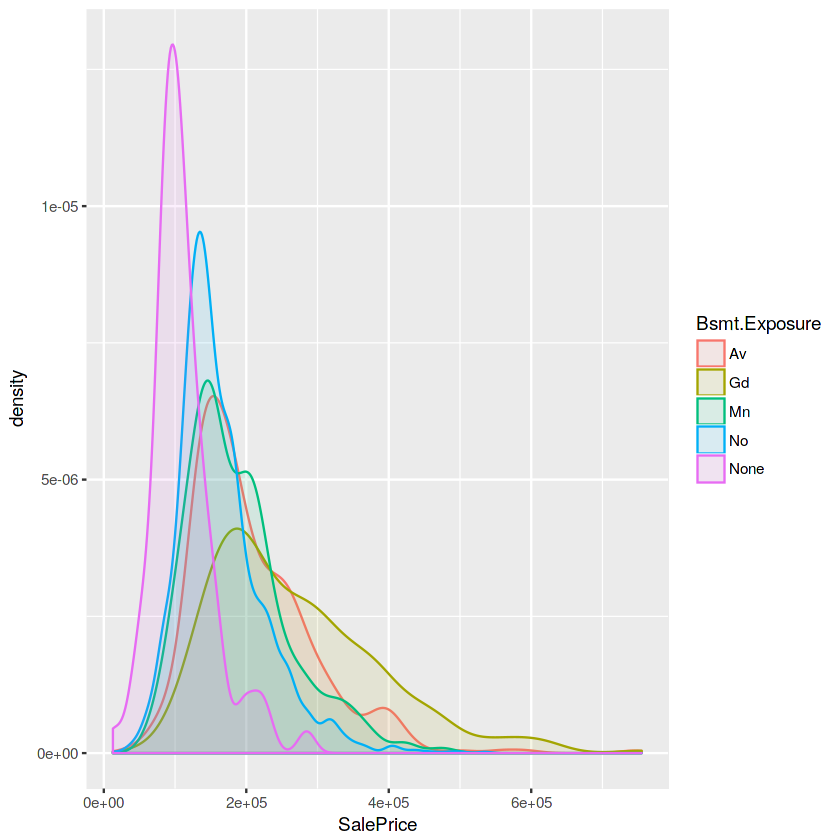

In [50]:
ggplot(data, aes(SalePrice, fill = Bsmt.Exposure, colour = Bsmt.Exposure)) +
  geom_density(alpha = 0.1)

In [51]:
bsmt.list <- c('None' = 0, 'No' = 1, 'Mn' = 2, 'Av' = 3, 'Gd' = 4)
df.numeric['Bsmt.Exposure'] <- as.numeric(bsmt.list[data[,'Bsmt.Exposure']])

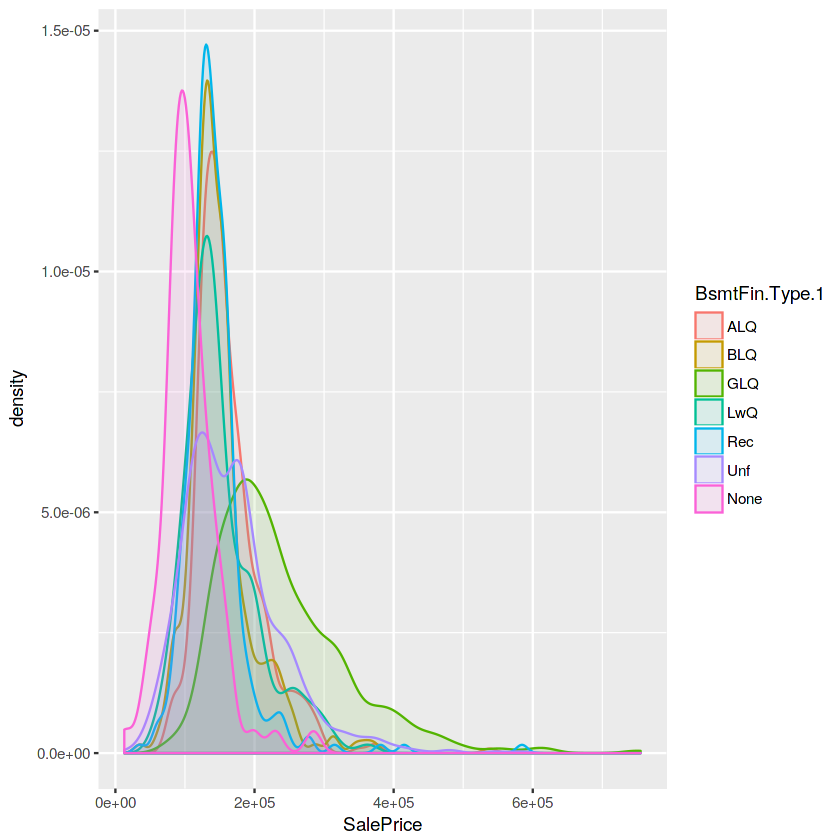

In [52]:
ggplot(data, aes(SalePrice, fill = BsmtFin.Type.1, colour = BsmtFin.Type.1)) +
  geom_density(alpha = 0.1)

In [53]:
ggplot(data, aes(SalePrice, fill = BsmtFin.Type.2, colour = BsmtFin.Type.2)) +
  geom_density(alpha = 0.1)

In [54]:
bsmt.fin.list <- c('None' = 0, 'Unf' = 1, 'LwQ' = 2,'Rec'= 3, 'BLQ' = 4, 'ALQ' = 5, 'GLQ' = 6)
df.numeric['BsmtFin.Type.2'] <- as.numeric(bsmt.fin.list[data[,'BsmtFin.Type.2']])
df.numeric['BsmtFin.Type.1'] <- as.numeric(bsmt.fin.list[data[,'BsmtFin.Type.1']])

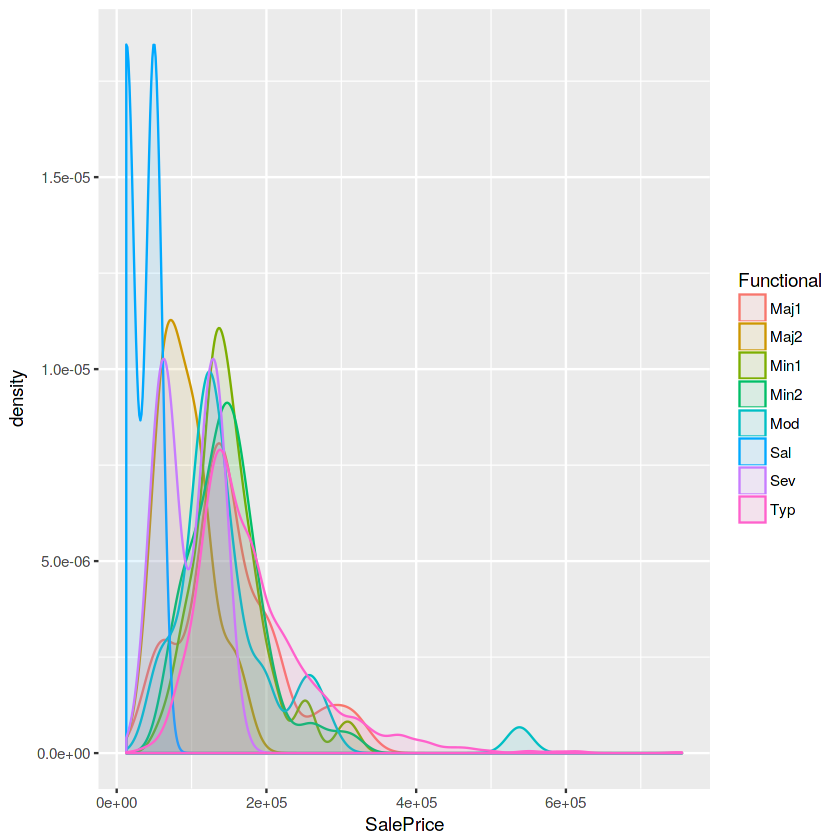

In [55]:
ggplot(data, aes(SalePrice, fill = Functional, colour = Functional)) +
  geom_density(alpha = 0.1)

In [56]:
functional.list <- c('None' = 0, 'Sal' = 1, 'Sev' = 2, 'Maj2' = 3, 'Maj1' = 4, 'Mod' = 5, 'Min2' = 6, 'Min1' = 7, 'Typ'= 8)
df.numeric['Functional'] <- as.numeric(functional.list[data[,'Functional']])

In [57]:
ggplot(data, aes(SalePrice, fill = Garage.Finish, colour = Garage.Finish)) +
  geom_density(alpha = 0.1)

In [58]:
garage.fin.list <- c('None' = 0,'Unf' = 1, 'RFn' = 1, 'Fin' = 2)
df.numeric['Garage.Finish'] <- as.numeric(garage.fin.list[data[,'Garage.Finish']])

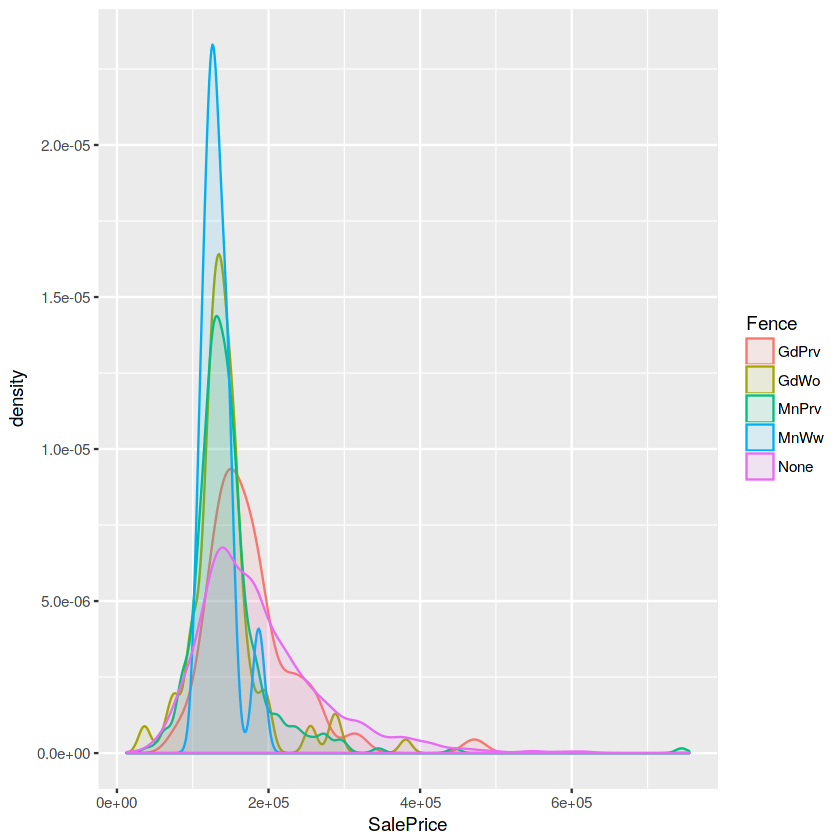

In [59]:
ggplot(data, aes(SalePrice, fill = Fence, colour = Fence)) +
  geom_density(alpha = 0.1)

In [60]:
fence.list <- c('None' = 0, 'MnWw' = 1, 'GdWo' = 1, 'MnPrv' = 2, 'GdPrv' = 4)
df.numeric['Fence'] <- as.numeric(fence.list[data[,'Fence']])

In [61]:

MSdwelling.list <- c('20' = 1, '30'= 0, '40' = 0, '45' = 0,'50' = 0, '60' = 1, '70' = 0, '75' = 0, '80' = 0, '85' = 0, '90' = 0, '120' = 1, '150' = 0, '160' = 0, '180' = 0, '190' = 0)
df.numeric['MS.SubClass'] <- as.numeric(MSdwelling.list[as.character(data$MS.SubClass)])

In [62]:
str(df.categorical)

'data.frame':	2927 obs. of  43 variables:
 $ MS.Zoning     : Factor w/ 7 levels "A (agr)","C (all)",..: 6 5 6 6 6 6 6 6 6 6 ...
 $ Street        : Factor w/ 2 levels "Grvl","Pave": 2 2 2 2 2 2 2 2 2 2 ...
 $ Alley         : Factor w/ 3 levels "Grvl","Pave",..: 3 3 3 3 3 3 3 3 3 3 ...
 $ Lot.Shape     : Factor w/ 4 levels "IR1","IR2","IR3",..: 1 4 1 4 1 1 4 1 1 4 ...
 $ Land.Contour  : Factor w/ 4 levels "Bnk","HLS","Low",..: 4 4 4 4 4 4 4 2 4 4 ...
 $ Utilities     : Factor w/ 3 levels "AllPub","NoSeWa",..: 1 1 1 1 1 1 1 1 1 1 ...
 $ Lot.Config    : Factor w/ 5 levels "Corner","CulDSac",..: 1 5 1 1 5 5 5 5 5 5 ...
 $ Land.Slope    : Factor w/ 3 levels "Gtl","Mod","Sev": 1 1 1 1 1 1 1 1 1 1 ...
 $ Neighborhood  : Factor w/ 28 levels "Blmngtn","Blueste",..: 16 16 16 16 9 9 25 25 25 9 ...
 $ Condition.1   : Factor w/ 9 levels "Artery","Feedr",..: 3 2 3 3 3 3 3 3 3 3 ...
 $ Condition.2   : Factor w/ 8 levels "Artery","Feedr",..: 3 3 3 3 3 3 3 3 3 3 ...
 $ Bldg.Type     : Factor w/ 5 levels

Now we’ve transformed all the categoric features with an ordianl scale into a numeric columns.
==

In [63]:
str(df.numeric)

'data.frame':	2927 obs. of  52 variables:
 $ MS.SubClass    : num  1 1 1 1 1 1 1 1 1 1 ...
 $ Lot.Frontage   : num  141 80 81 93 74 78 41 43 39 60 ...
 $ Lot.Area       : int  31770 11622 14267 11160 13830 9978 4920 5005 5389 7500 ...
 $ Overall.Qual   : int  6 5 6 7 5 6 8 8 8 7 ...
 $ Overall.Cond   : int  5 6 6 5 5 6 5 5 5 5 ...
 $ Year.Built     : int  1960 1961 1958 1968 1997 1998 2001 1992 1995 1999 ...
 $ Year.Remod.Add : int  1960 1961 1958 1968 1998 1998 2001 1992 1996 1999 ...
 $ Mas.Vnr.Area   : num  112 0 108 0 0 20 0 0 0 0 ...
 $ BsmtFin.SF.1   : num  639 468 923 1065 791 ...
 $ BsmtFin.SF.2   : num  0 144 0 0 0 0 0 0 0 0 ...
 $ Bsmt.Unf.SF    : num  441 270 406 1045 137 ...
 $ Total.Bsmt.SF  : num  1080 882 1329 2110 928 ...
 $ X1st.Flr.SF    : int  1656 896 1329 2110 928 926 1338 1280 1616 1028 ...
 $ X2nd.Flr.SF    : int  0 0 0 0 701 678 0 0 0 776 ...
 $ Low.Qual.Fin.SF: int  0 0 0 0 0 0 0 0 0 0 ...
 $ Gr.Liv.Area    : int  1656 896 1329 2110 1629 1604 1338 1280 1616 180

Since area is a very important feature. So we create a new feature called TotalArea

In [64]:
area.cols <- c('Lot.Frontage', 'Lot.Area', 'Mas.Vnr.Area', 'BsmtFin.SF.1', 'BsmtFin.SF.2', 'Bsmt.Unf.SF',
             'Total.Bsmt.SF', 'X1st.Flr.SF', 'X2nd.Flr.SF', 'Gr.Liv.Area', 'Garage.Area', 'Wood.Deck.SF', 
             'Open.Porch.SF', 'Enclosed.Porch', 'X3Ssn.Porch', 'Screen.Porch', 'Low.Qual.Fin.SF', 'Pool.Area')

df.numeric['TotalArea'] <- as.numeric(rowSums(data[,area.cols]))

In [65]:
library(corrplot)

corrplot 0.84 loaded


In [66]:
correlations <- cor(df.numeric)
corr.SalePrice <- as.matrix(sort(correlations[,'SalePrice'], decreasing = TRUE))
corr.idx <- names(which(apply(corr.SalePrice, 1, function(x) (x > 0.5 | x < -0.5))))
corrplot(as.matrix(correlations[corr.idx,corr.idx]), type = 'upper', method='color', addCoef.col = 'black', tl.cex = .7,cl.cex = .7, number.cex=.7)

In [67]:
library(GGally)



Attaching package: ‘GGally’

The following object is masked from ‘package:dplyr’:

    nasa



In [68]:
lm.plt <- function(data, mapping, ...){
   plt <- ggplot(data = data, mapping = mapping) + 
    geom_point(shape = 20, alpha = 0.7, color = 'darkseagreen') +
    geom_smooth(method=loess, fill="red", color="red") +
    geom_smooth(method=lm, fill="blue", color="blue") +
    theme_minimal()
  return(plt)
}

ggpairs(df.numeric, corr.idx[1:6], lower = list(continuous = lm.plt))

Warning message in simpleLoess(y, x, w, span, degree = degree, parametric = parametric, :
“pseudoinverse used at -0.025”Warning message in simpleLoess(y, x, w, span, degree = degree, parametric = parametric, :
“neighborhood radius 2.025”Warning message in simpleLoess(y, x, w, span, degree = degree, parametric = parametric, :
“reciprocal condition number  2.6677e-16”Warning message in simpleLoess(y, x, w, span, degree = degree, parametric = parametric, :
“There are other near singularities as well. 1”Warning message in predLoess(object$y, object$x, newx = if (is.null(newdata)) object$x else if (is.data.frame(newdata)) as.matrix(model.frame(delete.response(terms(object)), :
“pseudoinverse used at -0.025”Warning message in predLoess(object$y, object$x, newx = if (is.null(newdata)) object$x else if (is.data.frame(newdata)) as.matrix(model.frame(delete.response(terms(object)), :
“neighborhood radius 2.025”Warning message in predLoess(object$y, object$x, newx = if (is.null(newdata)) object$x

Now we can take a look at some categorical features. Maybe they can be binary! And then add them to our df.numeric!!
==

In [69]:
plot.categoric <- function(cols, df){
  for (col in cols) {
    order.cols <- names(sort(table(data[,col]), decreasing = TRUE))
  
    num.plot <- qplot(df[,col]) +
      geom_bar(fill = 'cornflowerblue') +
      geom_text(aes(label = ..count..), stat='count', vjust=-0.5) +
      theme_minimal() +
      scale_y_continuous(limits = c(0,max(table(df[,col]))*1.1)) +
      scale_x_discrete(limits = order.cols) +
      xlab(col) +
      theme(axis.text.x = element_text(angle = 30, size=12))
  
    print(num.plot)
  }
}

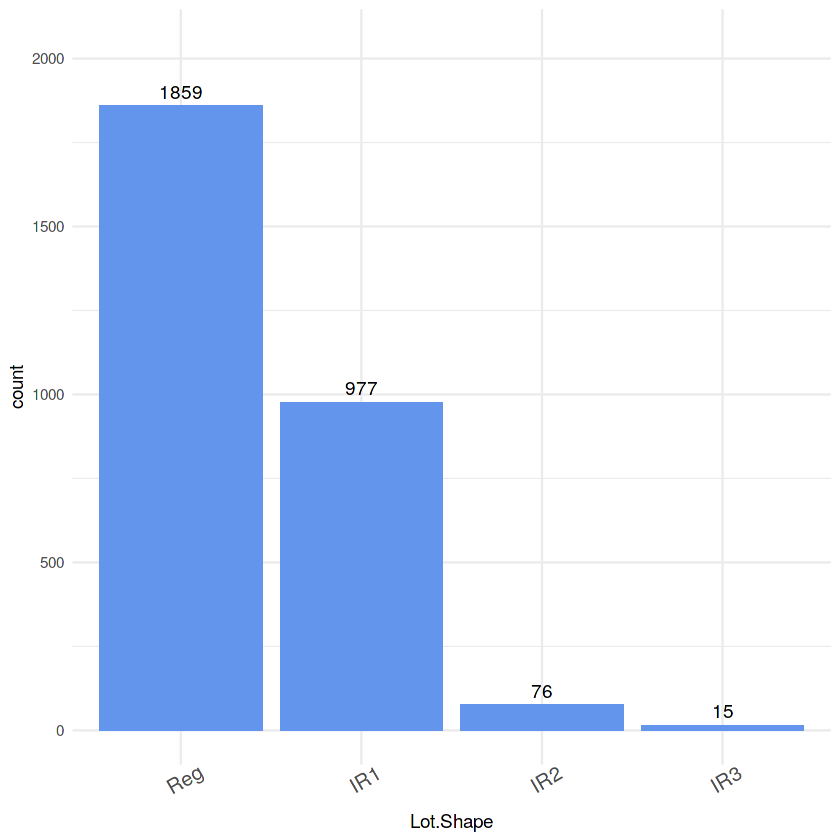

In [70]:
plot.categoric('Lot.Shape', data)

In [71]:
df.numeric['RegularLotShape'] <- (data$Lot.Shape == 'Reg') * 1

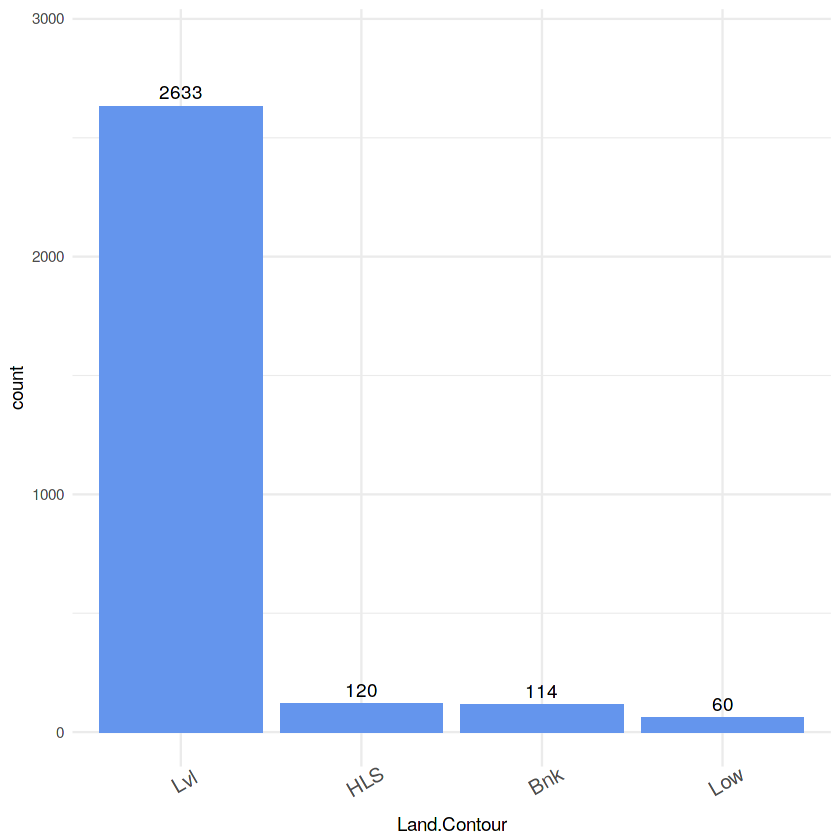

In [72]:
plot.categoric('Land.Contour', data)

In [73]:
df.numeric['LandLeveled'] <- (data$Land.Contour == 'Lvl') * 1

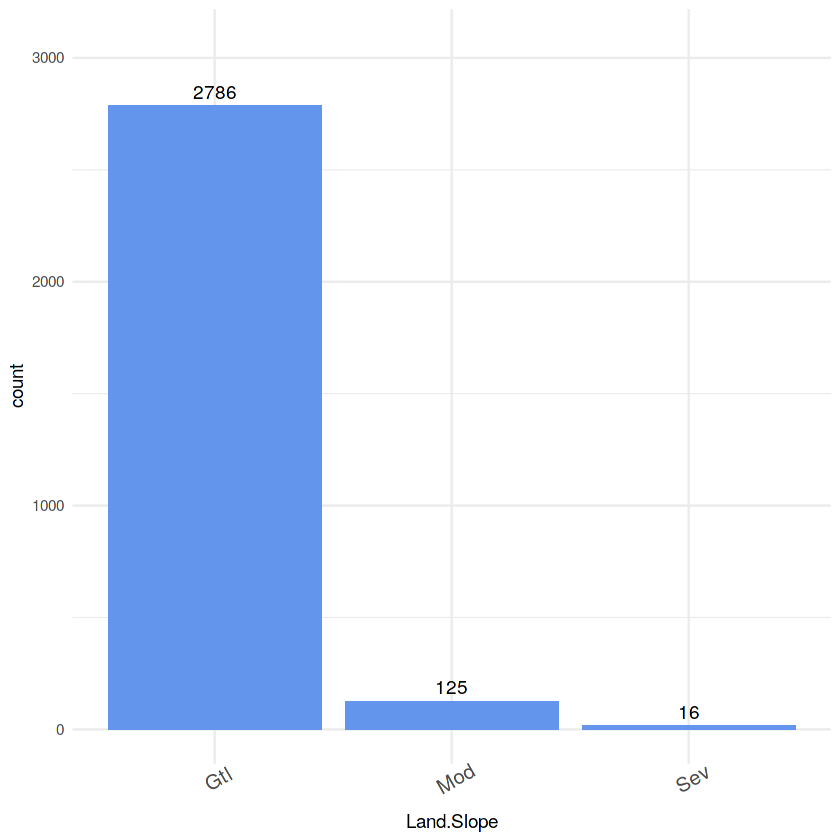

In [74]:
plot.categoric('Land.Slope', data)

In [75]:
df.numeric['LandSlopeGentle'] <- (data$Land.Slope == 'Gtl') * 1

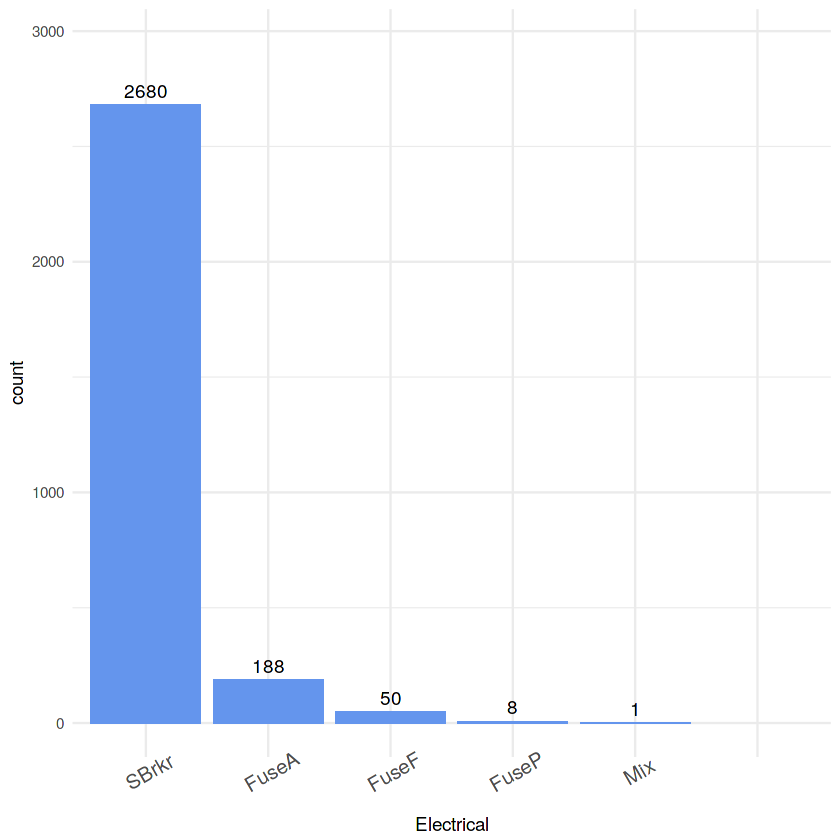

In [76]:
plot.categoric('Electrical', data)

In [77]:
df.numeric['ElectricalSB'] <- (data$Electrical == 'SBrkr') * 1

In [78]:
plot.categoric('Garage.Type', data)

In [79]:
df.numeric['GarageDetchd'] <- (data$Garage.Type == 'Detchd') * 1

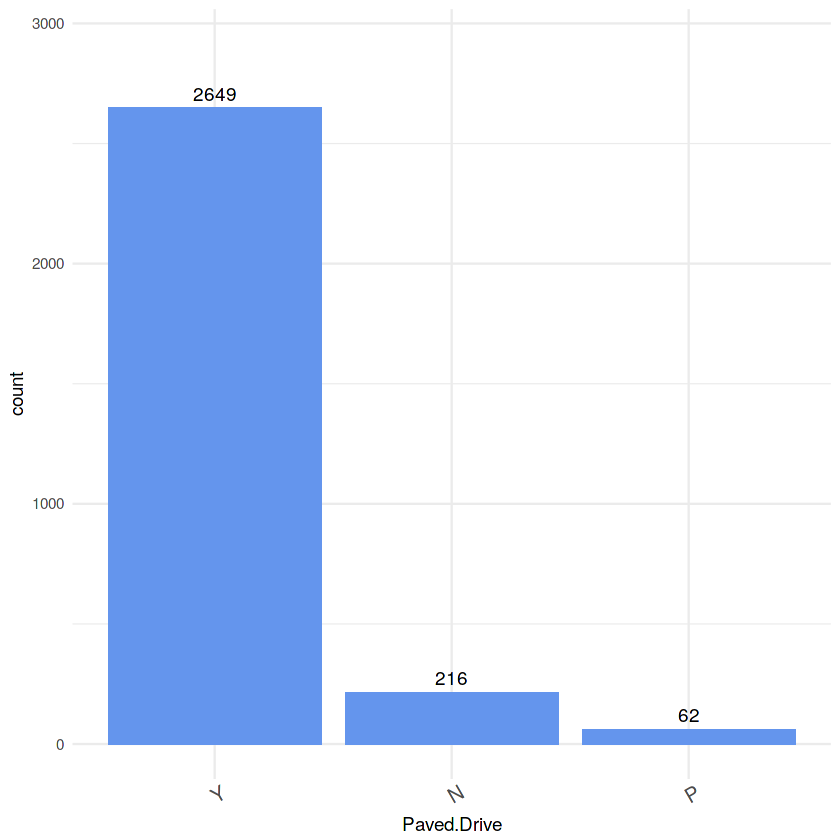

In [80]:
plot.categoric('Paved.Drive', data)

In [81]:
df.numeric['HasPavedDrive'] <- (data$Paved.Drive == 'Y') * 1

df.numeric['HasWoodDeck'] <- (data$Wood.Deck.SF > 0) * 1

df.numeric['Has2ndFlr'] <- (data$X2nd.Flr.SF > 0) * 1

df.numeric['HasMasVnr'] <- (data$Mas.Vnr.Area > 0) * 1

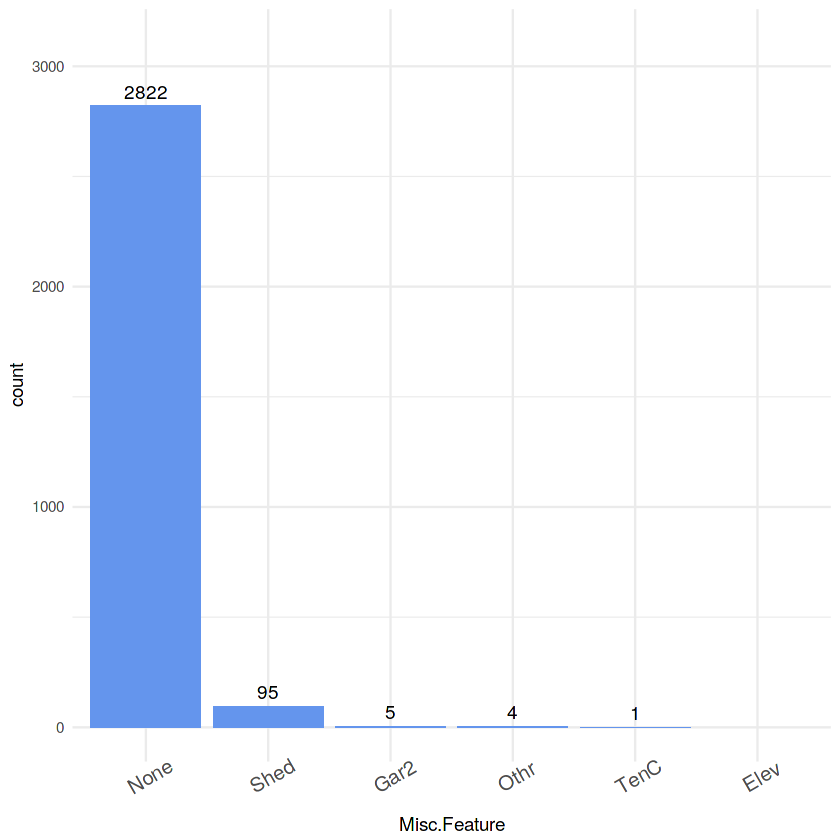

In [82]:
plot.categoric('Misc.Feature', data)

In [83]:
df.numeric['HasShed'] <- (data$Misc.Feature == 'Shed') * 1

In [84]:
df.numeric['Remodeled'] <- (data$Year.Built != data$Year.Remod.Add) * 1
df.numeric['RecentRemodel'] <- (data$Year.Remod.Add >= data$Yr.Sold) * 1
df.numeric['NewHouse'] <- (data$Year.Built == data$Yr.Sold) * 1

In [85]:
library(stringr)

In [86]:
cols.binary <- c('X2nd.Flr.SF', 'Mas.Vnr.Area', 'Wood.Deck.SF', 'Open.Porch.SF', 'Enclosed.Porch', 'X3Ssn.Porch', 'Screen.Porch')

for (col in cols.binary){
  df.numeric[str_c('Has',col)] <- (data[,col] != 0) * 1
}

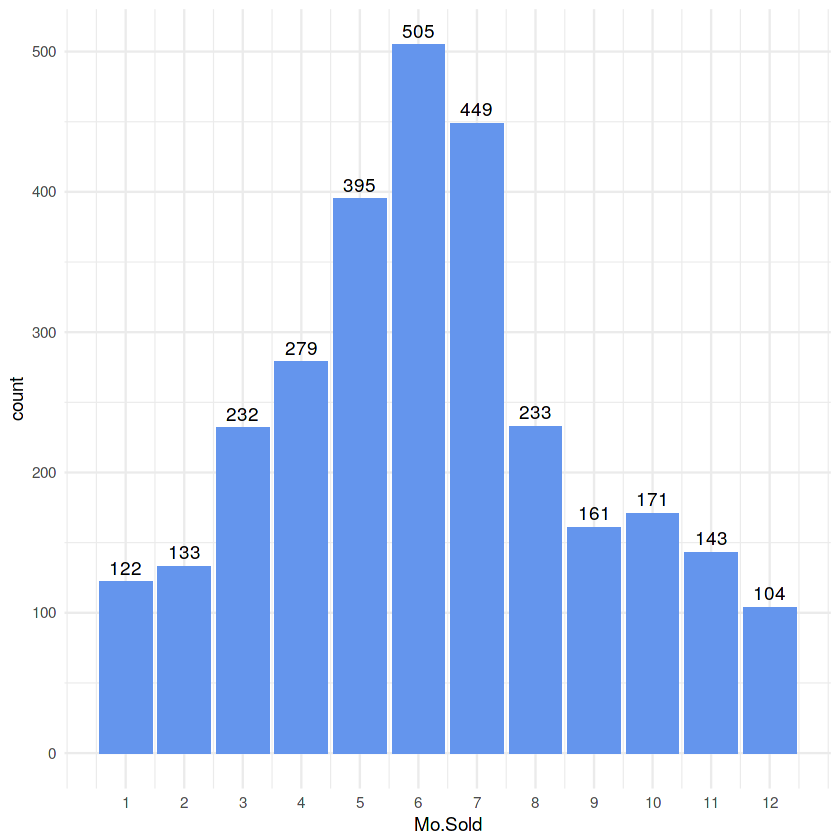

In [87]:
ggplot(data, aes(x=Mo.Sold)) +
  geom_bar(fill = 'cornflowerblue') +
  geom_text(aes(label=..count..), stat='count', vjust = -.5) +
  theme_minimal() +
  scale_x_continuous(breaks = 1:12)

We can find summer is hot season, so add binary..

In [88]:
df.numeric['HighSeason'] <- (data$Mo.Sold %in% c(5,6,7)) * 1

In [89]:
colnames(data)

[1] "MS.SubClass"     "MS.Zoning"       "Lot.Frontage"    "Lot.Area"       
 [5] "Street"          "Alley"           "Lot.Shape"       "Land.Contour"   
 [9] "Utilities"       "Lot.Config"      "Land.Slope"      "Neighborhood"   
[13] "Condition.1"     "Condition.2"     "Bldg.Type"       "House.Style"    
[17] "Overall.Qual"    "Overall.Cond"    "Year.Built"      "Year.Remod.Add" 
[21] "Roof.Style"      "Roof.Matl"       "Exterior.1st"    "Exterior.2nd"   
[25] "Mas.Vnr.Type"    "Mas.Vnr.Area"    "Exter.Qual"      "Exter.Cond"     
[29] "Foundation"      "Bsmt.Qual"       "Bsmt.Cond"       "Bsmt.Exposure"  
[33] "BsmtFin.Type.1"  "BsmtFin.SF.1"    "BsmtFin.Type.2"  "BsmtFin.SF.2"   
[37] "Bsmt.Unf.SF"     "Total.Bsmt.SF"   "Heating"         "Heating.QC"     
[41] "Central.Air"     "Electrical"      "X1st.Flr.SF"     "X2nd.Flr.SF"    
[45] "Low.Qual.Fin.SF" "Gr.Liv.Area"     "Bsmt.Full.Bath"  "Bsmt.Half.Bath" 
[49] "Full.Bath"       "Half.Bath"       "Bedroom.AbvGr"   "Kitchen.AbvGr"  
[53] "Kitchen.Qual"    "TotRms.AbvGrd"   "Functional"      "Fireplaces"     
[57] "Fireplace.Qu"    "Garage.Type"     "Garage.Yr.Blt"   "Garage.Finish"  
[61] "Garage.Cars"     "Garage.Area"     "Garage.Qual"     "Garage.Cond"    
[65] "Paved.Drive"     "Wood.Deck.SF"    "Open.Porch.SF"   "Enclosed.Porch" 
[69] "X3Ssn.Porch"     "Screen.Porch"    "Pool.Area"       "Pool.QC"        
[73] "Fence"           "Misc.Feature"    "Misc.Val"        "Mo.Sold"        
[77] "Yr.Sold"         "Sale.Type"       "Sale.Condition"  "SalePrice"

Neighborhood mean.Quality mean.Price n  
1  MeadowV      4.38          95756.49   37
2  IDOTRR       4.73         103752.90   93
3  Edwards      4.97         130130.97  191
4  Sawyer       5.07         136751.15  151
5  BrkSide      5.12         124756.25  108
6  OldTown      5.21         123991.89  239
7  NAmes        5.33         145097.35  443
8  SWISU        5.44         135071.94   48
9  Mitchel      5.54         162226.63  114
10 BrDale       5.73         105608.33   30
11 ClearCr      5.98         208662.09   44
12 Landmrk      6.00         137000.00    1
13 NPkVill      6.26         140710.87   23
14 Crawfor      6.27         207550.83  103
15 NWAmes       6.34         188406.91  131
16 SawyerW      6.34         184070.18  125
17 Gilbert      6.52         190646.58  165
18 Blueste      6.60         143590.00   10
19 CollgCr      6.68         201803.43  267
20 GrnHill      7.00         280000.00    2
21 Blmngtn      7.14         196661.68   28
22 Timber       7.19         246599.54   72
23 Veenker      7.21         248314.58   24
24 Somerst      7.40         229707.32  182
25 NoRidge      7.93         330319.13   71
26 Greens       8.00         193531.25    8
27 NridgHt      8.28         322018.27  166
28 StoneBr      8.37         324229.20   51

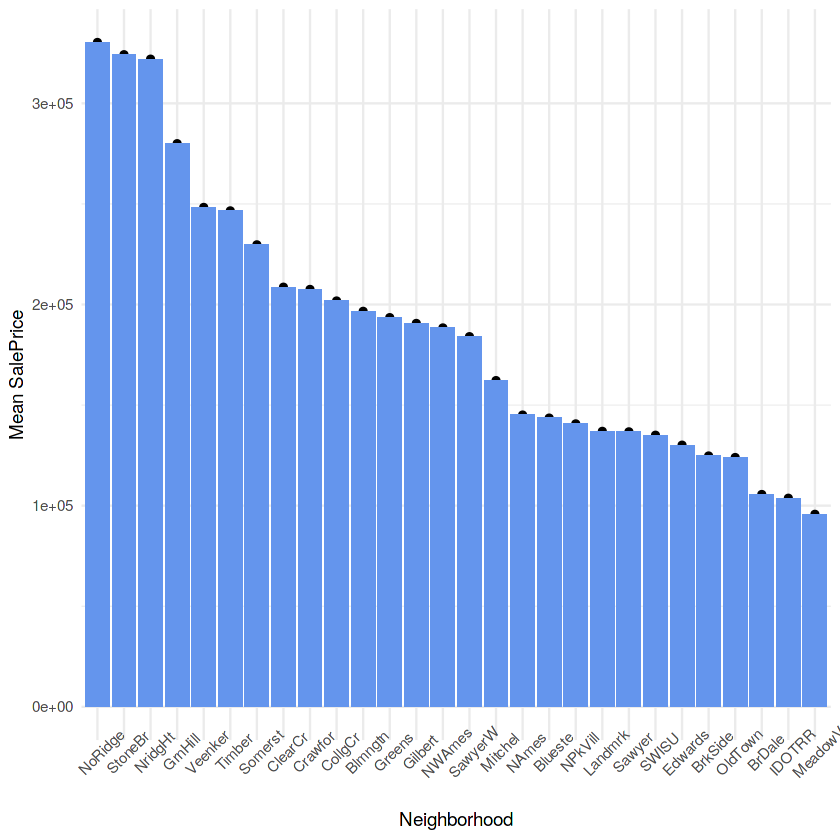

In [90]:
group.prices('Neighborhood')

In [91]:
nbrh.map <- c('MeadowV' = 0, 'IDOTRR' = 1, 'Sawyer' = 1, 'BrDale' = 1, 'OldTown' = 1, 'Edwards' = 1, 
             'BrkSide' = 1, 'Blueste' = 1, 'SWISU' = 2, 'NAmes' = 2, 'NPkVill' = 2, 'Mitchel' = 2,
             'SawyerW' = 2, 'Gilbert' = 2, 'NWAmes' = 2, 'Blmngtn' = 2, 'CollgCr' = 2, 'ClearCr' = 3, 
             'Crawfor' = 3, 'Veenker' = 3, 'Somerst' = 3, 'Timber' = 3, 'StoneBr' = 4, 'NoRidge' = 4, 
             'NridgHt' = 4)

df.numeric['NeighborhoodBin'] <- as.numeric(nbrh.map[data$Neighborhood])

Sale.Condition mean.Quality mean.Price n   
1 AdjLand        5.00         108916.7     12
2 Abnorml        5.41         140396.3    190
3 Alloca         5.46         161843.7     24
4 Family         5.83         157488.6     46
5 Normal         6.01         175567.6   2413
6 Partial        7.61         274579.0    242

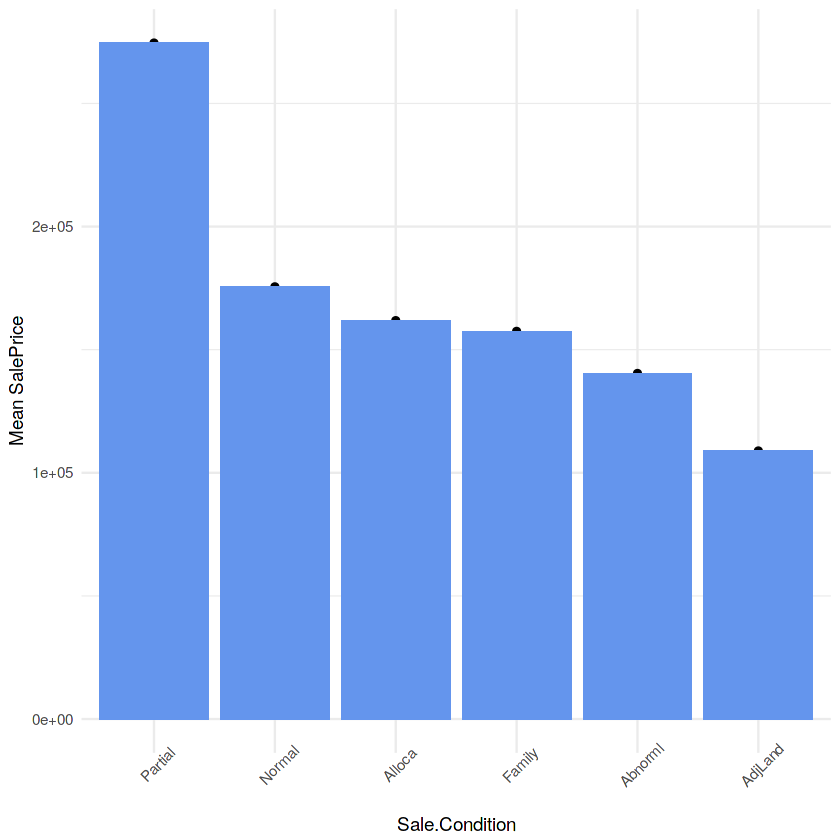

In [92]:
group.prices('Sale.Condition')


In [93]:
df.numeric['PartialPlan'] <- (data$Sale.Condition == 'Partial') * 1

Heating.QC mean.Quality mean.Price n   
1 Po         3.33          69033.33     3
2 Fa         4.99         122949.60    92
3 TA         5.34         138984.86   864
4 Gd         5.64         156855.06   476
5 Ex         6.74         216447.36  1492

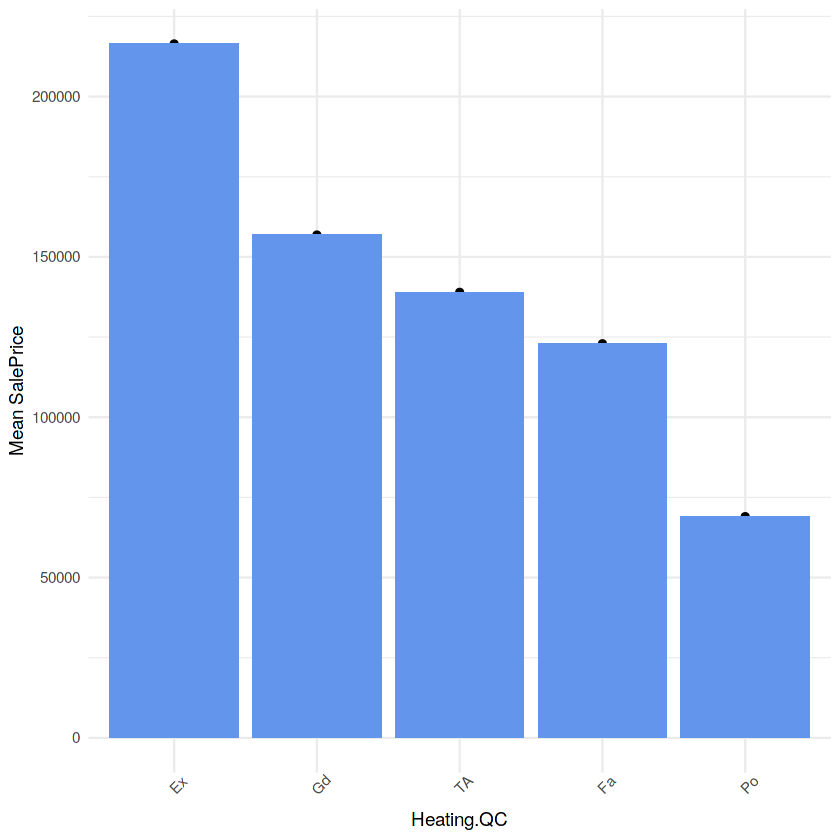

In [94]:
group.prices('Heating.QC')

In [95]:
heating.list <- c('Po' = 0, 'Fa' = 1, 'TA' = 2, 'Gd' = 3, 'Ex' = 4)

df.numeric['HeatingScale'] <- as.numeric(heating.list[data$Heating.QC])

In [96]:
#Since time is very important we can add more features to describe it
df.numeric['TimeSinceSold'] <- as.numeric(2010 - data$Yr.Sold)

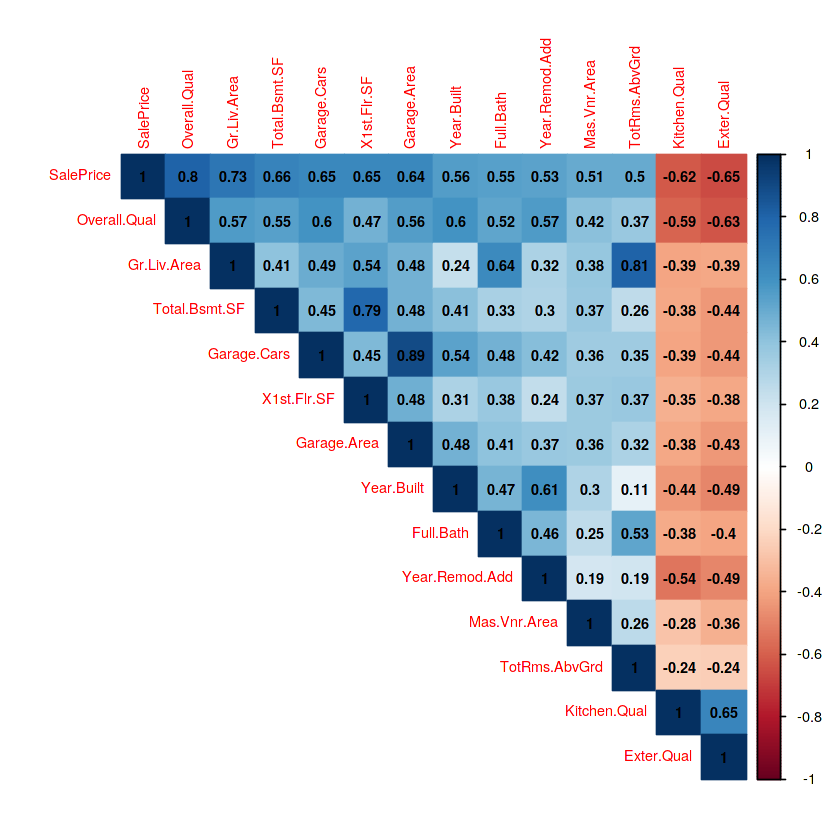

In [97]:
correlations <- cor(df.numeric)
corr.SalePrice <- as.matrix(sort(correlations[,'SalePrice'], decreasing = TRUE))
corr.idx <- names(which(apply(corr.SalePrice, 1, function(x) (x > 0.5 | x < -0.5))))
corrplot(as.matrix(correlations[corr.idx,corr.idx]), type = 'upper', method='color', addCoef.col = 'black', tl.cex = .7,cl.cex = .7, number.cex=.7)

In [98]:
summary(df.numeric)

  MS.SubClass      Lot.Frontage       Lot.Area       Overall.Qual   
 Min.   :0.0000   Min.   : 21.00   Min.   :  1300   Min.   : 1.000  
 1st Qu.:0.0000   1st Qu.: 60.00   1st Qu.:  7439   1st Qu.: 5.000  
 Median :1.0000   Median : 70.00   Median :  9430   Median : 6.000  
 Mean   :0.6297   Mean   : 69.34   Mean   : 10109   Mean   : 6.091  
 3rd Qu.:1.0000   3rd Qu.: 80.00   3rd Qu.: 11523   3rd Qu.: 7.000  
 Max.   :1.0000   Max.   :313.00   Max.   :215245   Max.   :10.000  
                                                                    
  Overall.Cond     Year.Built   Year.Remod.Add  Mas.Vnr.Area   
 Min.   :1.000   Min.   :1872   Min.   :1950   Min.   :   0.0  
 1st Qu.:5.000   1st Qu.:1954   1st Qu.:1965   1st Qu.:   0.0  
 Median :5.000   Median :1973   Median :1993   Median :   0.0  
 Mean   :5.564   Mean   :1971   Mean   :1984   Mean   : 100.3  
 3rd Qu.:6.000   3rd Qu.:2000   3rd Qu.:2004   3rd Qu.: 162.0  
 Max.   :9.000   Max.   :2010   Max.   :2010   Max.   :1600.0  


We can again see some NAs, this time these NAs are actually 0 -- nominal
==

In [99]:
dataset = df.numeric
dataset[is.na(dataset)] = 0

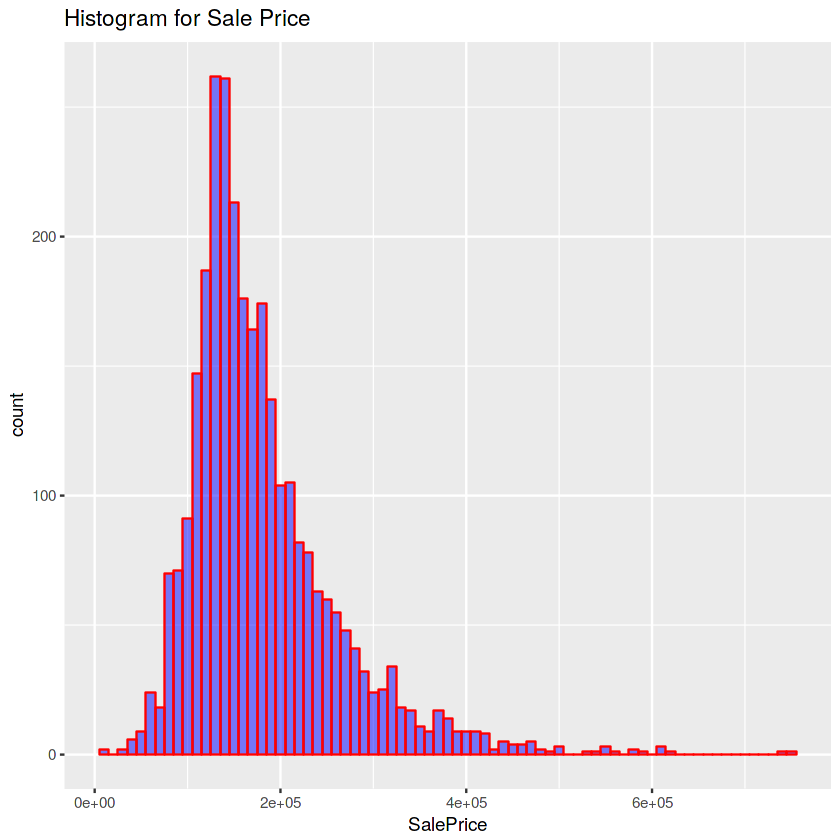

In [100]:
ggplot(data, aes(SalePrice)) + geom_histogram(binwidth = 10000,fill=I("blue"), col=I("red"),alpha=I(.5)) + labs(title = "Histogram for Sale Price")

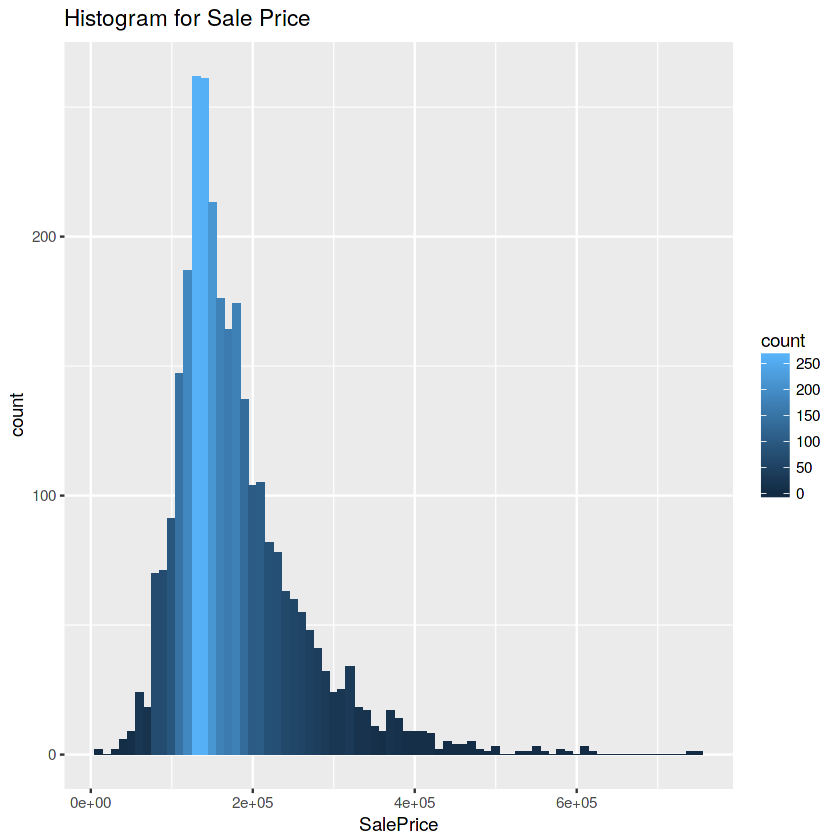

In [101]:
ggplot(data, aes(SalePrice)) + geom_histogram(binwidth = 10000,aes(fill=..count..)) + labs(title = "Histogram for Sale Price")

trend line -- geom_density
==

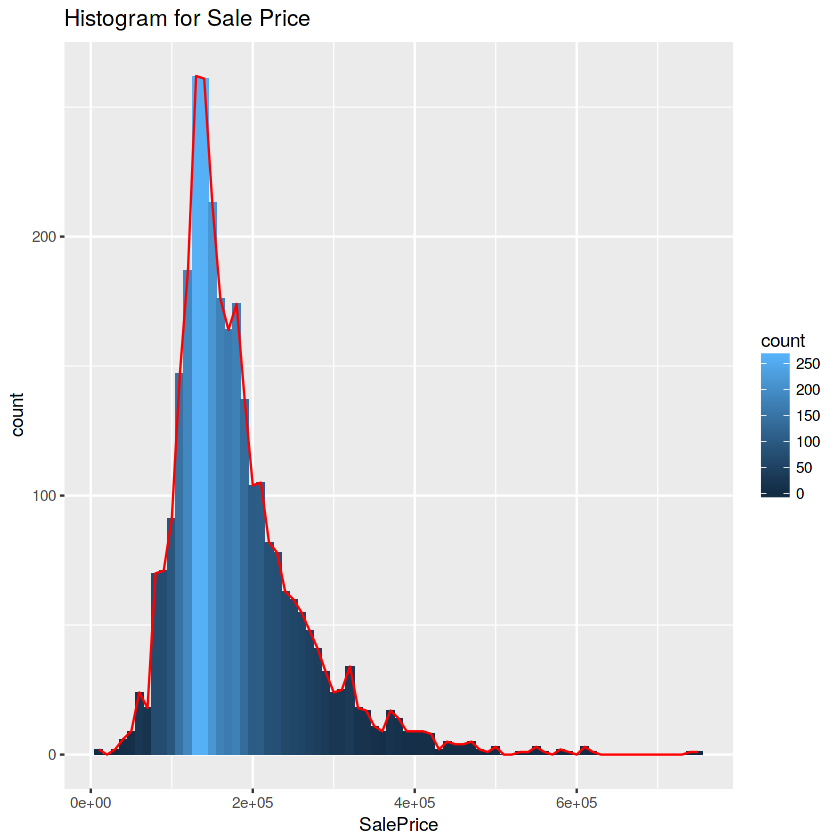

In [102]:
ggplot(data, aes(SalePrice)) + geom_histogram(binwidth = 10000,aes(fill=..count..)) + stat_bin(geom="line",binwidth = 10000, col = 'red')+ labs(title = "Histogram for Sale Price")

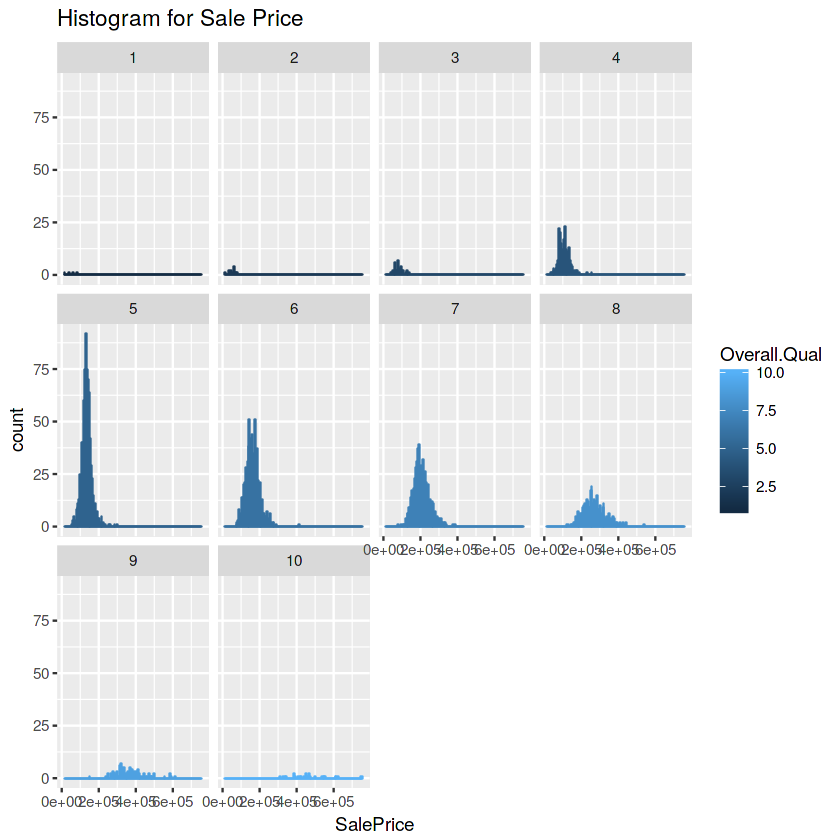

In [103]:
ggplot(data, aes(SalePrice)) + geom_histogram(binwidth = 5000,aes(color =Overall.Qual, fill = Overall.Qual )) + facet_wrap(~Overall.Qual)+ labs(title = "Histogram for Sale Price")

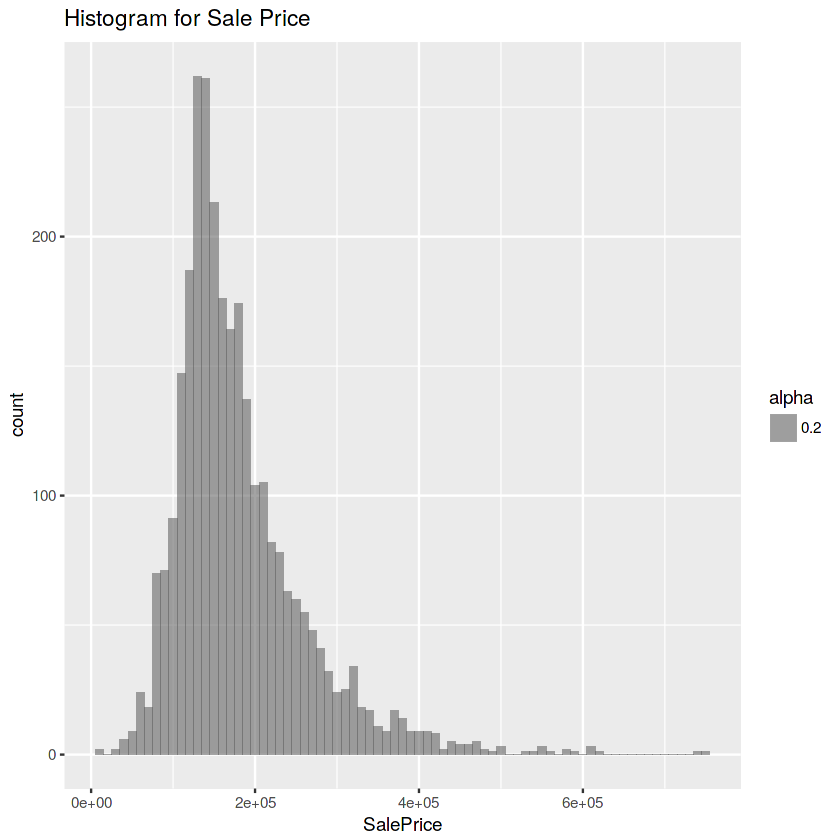

In [104]:
ggplot(data, aes(SalePrice)) + geom_histogram(binwidth = 10000,aes(color =Overall.Qual,fill = Overall.Qual, alpha = 0.2)) + labs(title = "Histogram for Sale Price")

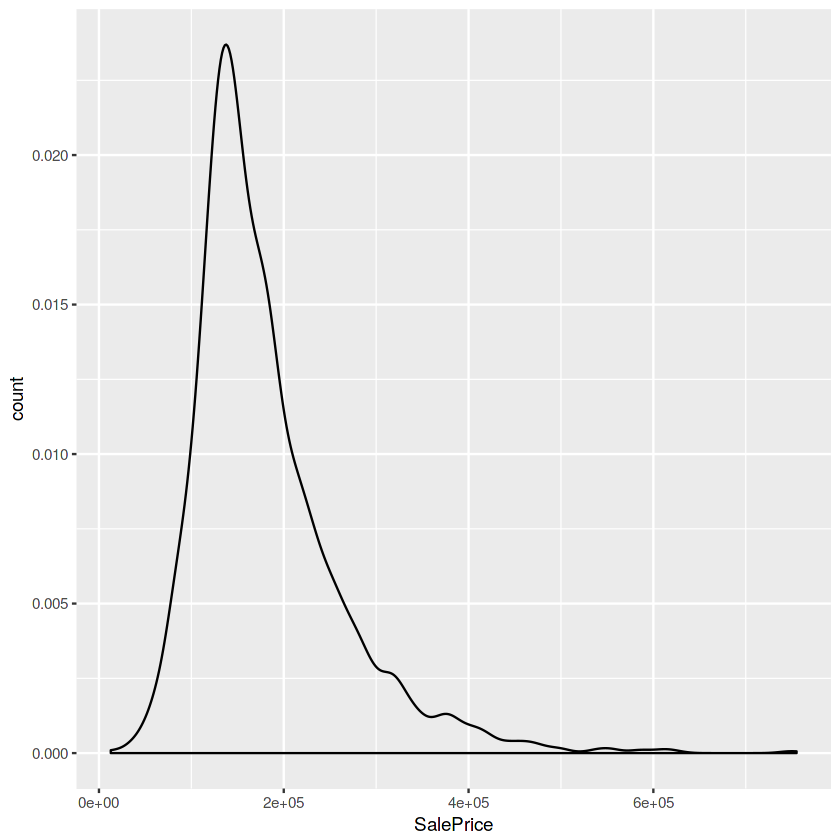

In [105]:
# Preserves marginal densities
ggplot(data, aes(SalePrice, ..count.., fill = Overall.Qual)) +
  geom_density(position = "stack")

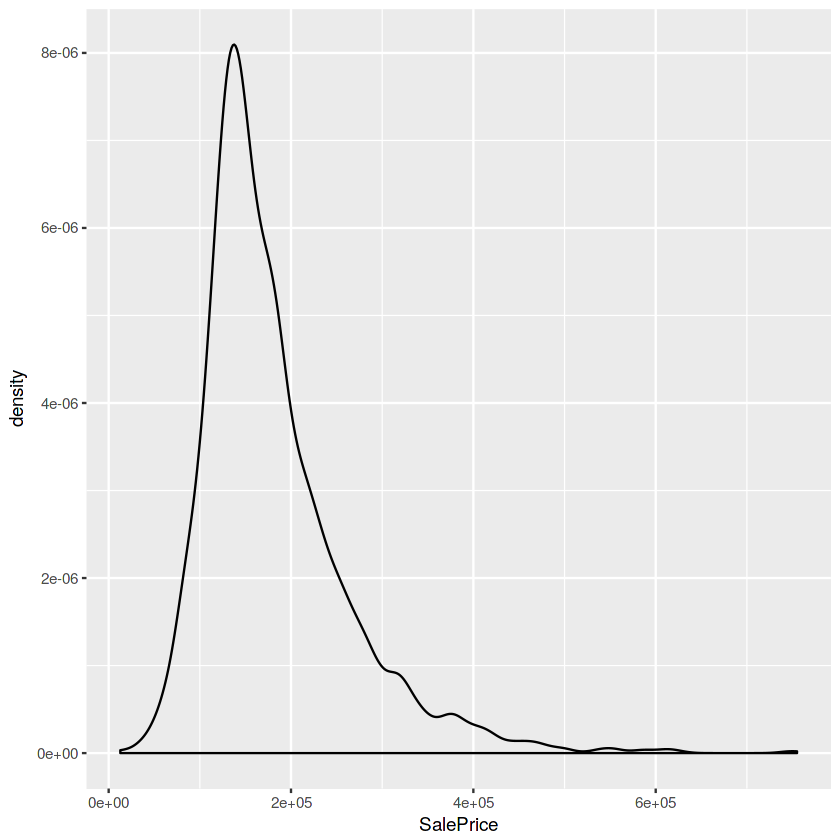

In [106]:
# Loses marginal densities
ggplot(data, aes(SalePrice, fill = Overall.Qual)) +
  geom_density(position = "stack")

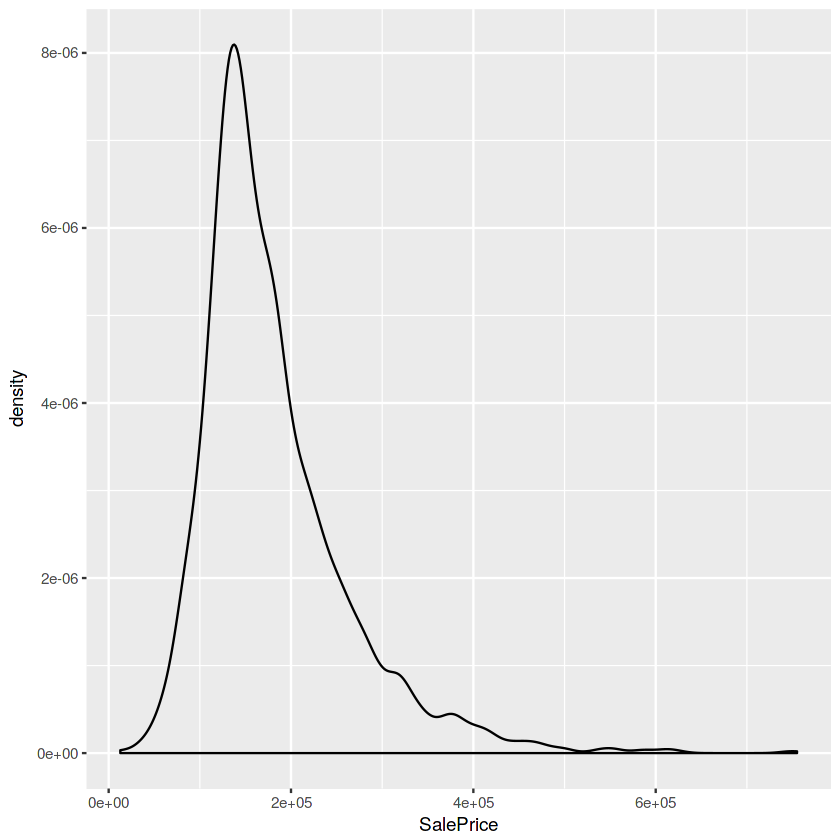

In [107]:
ggplot(data, aes(SalePrice, fill = Overall.Qual, colour = Overall.Qual)) +
  geom_density(alpha = 0.1)

In [108]:
ggplot(data, aes(SalePrice, fill = Sale.Condition, colour = Sale.Condition)) +
  geom_density(alpha = 0.1)

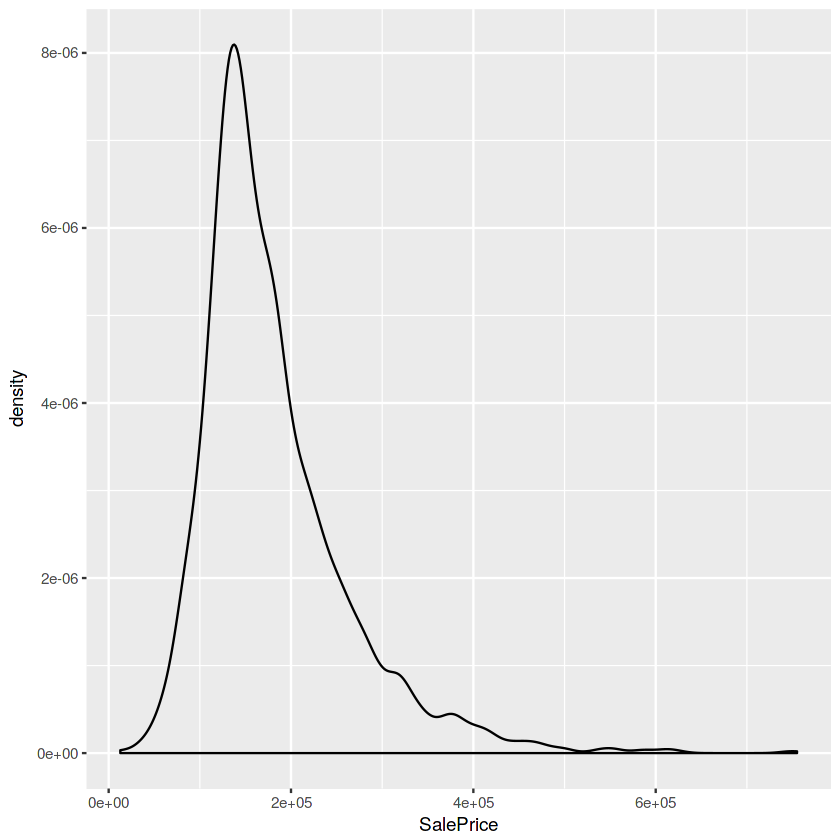

In [109]:
ggplot(data, aes(SalePrice, fill = Overall.Cond, colour = Overall.Cond)) +
  geom_density(alpha = 0.1)

In [110]:
library(lattice)

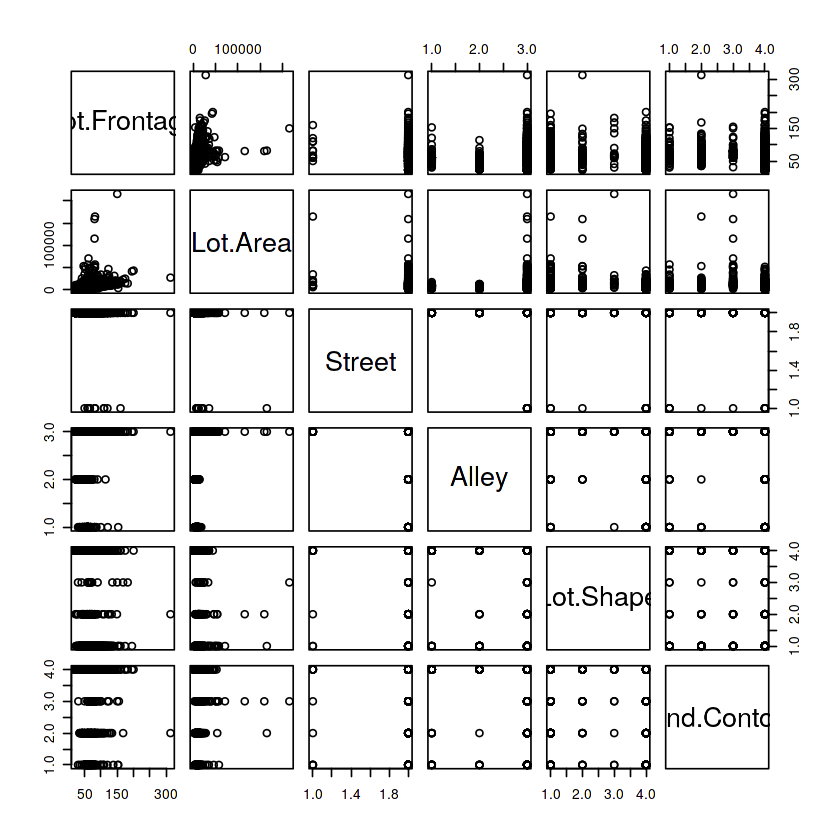

In [111]:
pairs(data[3:8])

In [112]:
library(GGally)

`stat_bin()` using `bins = 30`. Pick better value with `binwidth`.
`stat_bin()` using `bins = 30`. Pick better value with `binwidth`.
`stat_bin()` using `bins = 30`. Pick better value with `binwidth`.
`stat_bin()` using `bins = 30`. Pick better value with `binwidth`.
`stat_bin()` using `bins = 30`. Pick better value with `binwidth`.
`stat_bin()` using `bins = 30`. Pick better value with `binwidth`.
`stat_bin()` using `bins = 30`. Pick better value with `binwidth`.
`stat_bin()` using `bins = 30`. Pick better value with `binwidth`.


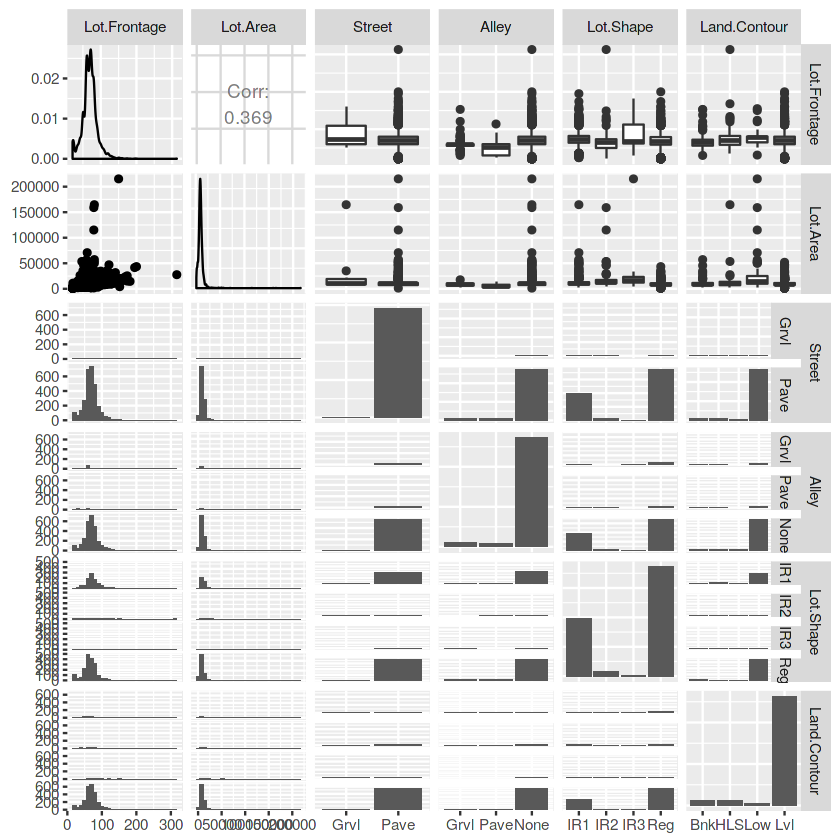

In [113]:
ggpairs(data[3:8],cardinality_threshold = 16)

Create dummy variables for categorical variables
==

In [114]:
dim(dataset)

[1] 2927   78

In [115]:
any(is.na(dataset))

[1] FALSE

In [116]:
dataset[37]

SalePrice
1    215000   
2    105000   
3    172000   
4    244000   
5    189900   
6    195500   
7    213500   
8    191500   
9    236500   
10   189000   
11   175900   
12   185000   
13   180400   
14   171500   
15   212000   
16   538000   
17   164000   
18   394432   
19   141000   
20   210000   
21   190000   
22   170000   
23   216000   
24   149000   
25   149900   
26   142000   
27   126000   
28   115000   
29   184000   
30    96000   
⋮    ⋮        
2901 320000   
2902 369900   
2903 359900   
2904  81500   
2905 215000   
2906 164000   
2907 153500   
2908  84500   
2909 104500   
2910 127000   
2911 151400   
2912 126500   
2913 146500   
2914  73000   
2915  79400   
2916 140000   
2917  92000   
2918  87550   
2919  79500   
2920  90500   
2921  71000   
2922 150900   
2923 188000   
2924 160000   
2925 131000   
2926 142500   
2927 131000   
2928 132000   
2929 170000   
2930 188000

Split data to training and testing
==

In [117]:
library(caTools)
set.seed(123)
split = sample.split(dataset, SplitRatio = 0.75)
training_set = subset(dataset, split == TRUE)
test_set = subset(dataset, split == FALSE)

In [118]:
training_set[-37] = data.frame(scale(training_set[-37]))
test_set[-37] = data.frame(scale(test_set[-37]))

Create model
==

In [119]:
head(training_set)

MS.SubClass Lot.Frontage Lot.Area    Overall.Qual Overall.Cond Year.Built
1  0.7606104    3.2694301    3.07769130 -0.07212328  -0.4948409   -0.3845857
3  0.7606104    0.5183837    0.59650881 -0.07212328   0.4069061   -0.4509131
6  0.7606104    0.3808314   -0.01148934 -0.07212328   0.4069061    0.8756339
7  0.7606104   -1.3156472   -0.72849905  1.32784104  -0.4948409    0.9751249
9  0.7606104   -1.4073488   -0.66201476  1.32784104  -0.4948409    0.7761429
10 0.7606104   -0.4444825   -0.36276456  0.62785888  -0.4948409    0.9087975
   Year.Remod.Add Mas.Vnr.Area BsmtFin.SF.1 BsmtFin.SF.2 ⋯ HasWood.Deck.SF
1  -1.1617275      0.06473322   0.4505707   -0.2808577   ⋯  1.060474      
3  -1.2571139      0.04216134   1.0951098   -0.2808577   ⋯  1.060474      
6   0.6506156     -0.45441998   0.3665990   -0.2808577   ⋯  1.060474      
7   0.7936954     -0.56727937   0.3983721   -0.2808577   ⋯ -0.942541      
9   0.5552292     -0.56727937   1.6783723   -0.2808577   ⋯  1.060474      
10  0.6983089     -0.56727937  -0.9996424   -0.2808577   ⋯  1.060474      
   HasOpen.Porch.SF HasEnclosed.Porch HasX3Ssn.Porch HasScreen.Porch HighSeason
1   0.8766779       -0.4297164        -0.116248      -0.2985588       1.0893010
3   0.8766779       -0.4297164        -0.116248      -0.2985588       1.0893010
6   0.8766779       -0.4297164        -0.116248      -0.2985588       1.0893010
7  -1.1401451        2.3260459        -0.116248      -0.2985588      -0.9175976
9   0.8766779       -0.4297164        -0.116248      -0.2985588      -0.9175976
10  0.8766779       -0.4297164        -0.116248      -0.2985588       1.0893010
   NeighborhoodBin PartialPlan HeatingScale TimeSinceSold
1  -0.1045785      -0.3040062  -0.2995725   -1.678687    
3  -0.1045785      -0.3040062   1.4248863   -1.678687    
6  -0.1045785      -0.3040062  -0.8743921   -1.678687    
7   1.7215553      -0.3040062  -0.8743921   -1.678687    
9   1.7215553      -0.3040062  -0.8743921   -1.678687    
10 -0.1045785      -0.3040062   0.2752471   -1.678687

In [120]:
dim(training_set)

[1] 2174   78

In [121]:
#linear regression
model_linear = lm(SalePrice ~., data = training_set)

In [122]:
formula(model_linear)

SalePrice ~ MS.SubClass + Lot.Frontage + Lot.Area + Overall.Qual + 
    Overall.Cond + Year.Built + Year.Remod.Add + Mas.Vnr.Area + 
    BsmtFin.SF.1 + BsmtFin.SF.2 + Bsmt.Unf.SF + Total.Bsmt.SF + 
    X1st.Flr.SF + X2nd.Flr.SF + Low.Qual.Fin.SF + Gr.Liv.Area + 
    Bsmt.Full.Bath + Bsmt.Half.Bath + Full.Bath + Half.Bath + 
    Bedroom.AbvGr + Kitchen.AbvGr + TotRms.AbvGrd + Fireplaces + 
    Garage.Yr.Blt + Garage.Cars + Garage.Area + Wood.Deck.SF + 
    Open.Porch.SF + Enclosed.Porch + X3Ssn.Porch + Screen.Porch + 
    Pool.Area + Misc.Val + Mo.Sold + Yr.Sold + Exter.Qual + Exter.Cond + 
    Garage.Qual + Garage.Cond + Fireplace.Qu + Kitchen.Qual + 
    Heating.QC + Bsmt.Qual + Bsmt.Cond + Bsmt.Exposure + BsmtFin.Type.2 + 
    BsmtFin.Type.1 + Functional + Garage.Finish + Fence + TotalArea + 
    RegularLotShape + LandLeveled + LandSlopeGentle + ElectricalSB + 
    GarageDetchd + HasPavedDrive + HasWoodDeck + Has2ndFlr + 
    HasMasVnr + HasShed + Remodeled + RecentRemodel + NewHouse

In [123]:
y_pred = predict(model_linear, newdata = test_set)

Warning message in predict.lm(model_linear, newdata = test_set):
“prediction from a rank-deficient fit may be misleading”

In [124]:
median(dataset$SalePrice)

[1] 160000

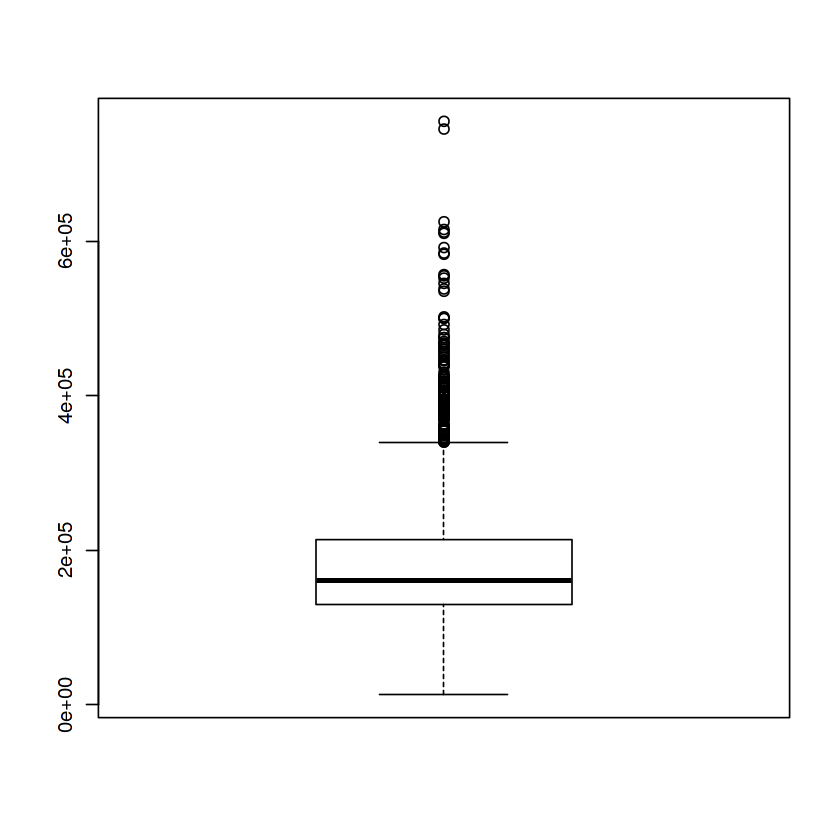

In [125]:
boxplot(dataset$SalePrice)

Warning message in predict.lm(model_linear, newdata = training_set):
“prediction from a rank-deficient fit may be misleading”

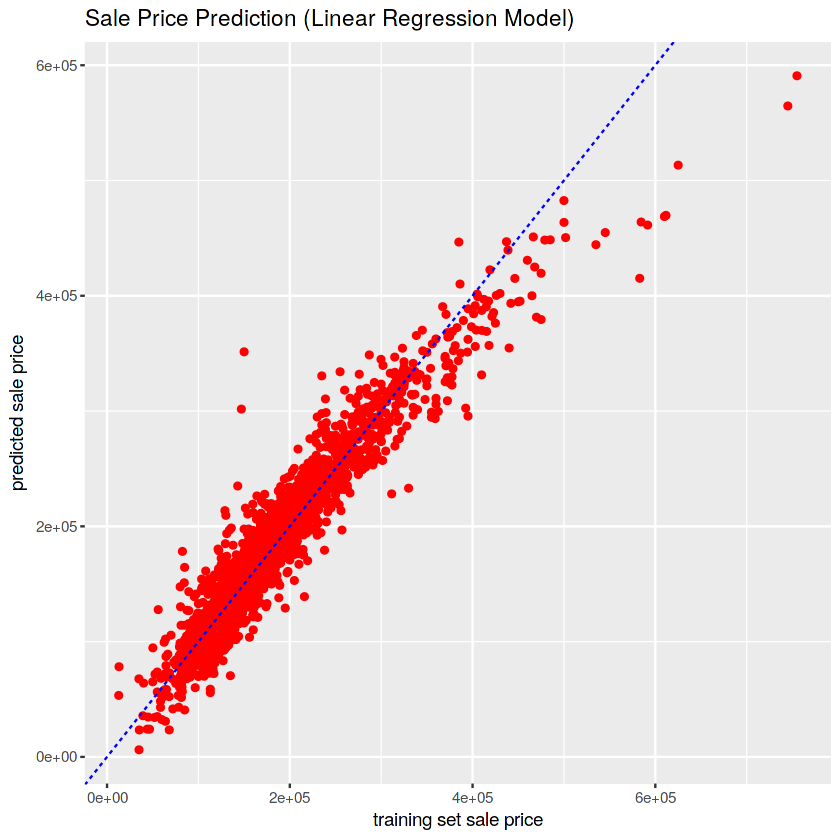

In [126]:
y_pred2 = predict(model_linear, newdata = training_set)
ggplot() +
  geom_point(aes(x = training_set$SalePrice, y = y_pred2),
             colour = 'red')+
  geom_abline(intercept = 0, slope = 1,colour = 'blue',lty =2) + 
  ggtitle("Sale Price Prediction (Linear Regression Model)") + xlab('training set sale price') + ylab('predicted sale price')

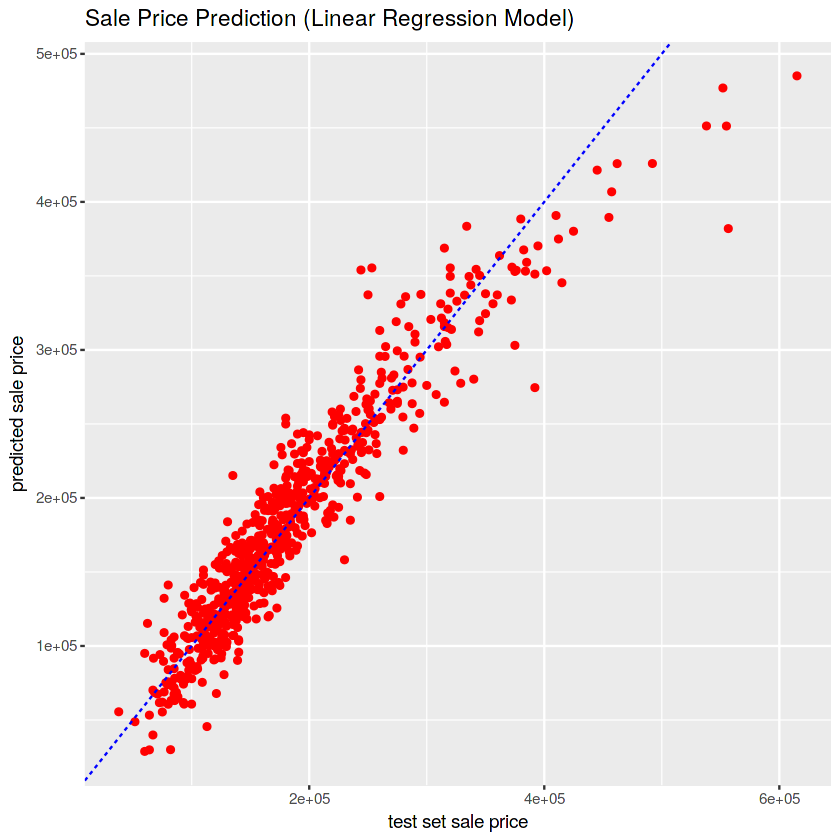

In [127]:
ggplot() +
  geom_point(aes(x = test_set$SalePrice, y = y_pred),
             colour = 'red')+
  geom_abline(intercept = 0, slope = 1,colour = 'blue',lty =2) + 
  ggtitle("Sale Price Prediction (Linear Regression Model)") + xlab('test set sale price') + ylab('predicted sale price')

In [128]:
dim(test_set)[1]

[1] 753

In [129]:
25510/mean(dataset$SalePrice)

[1] 0.1410945

In [130]:
max(dataset$SalePrice)

[1] 755000

In [131]:
rmse = function(model){
    return (sqrt(sum((test_set$SalePrice - (predict(model, newdata = test_set )))^2)/dim(test_set)[1]))
}

In [132]:
sse1 = rmse(model_linear)

Warning message in predict.lm(model, newdata = test_set):
“prediction from a rank-deficient fit may be misleading”

In [133]:
sse1

[1] 25510.62

In [134]:
summary(model_linear)


Call:
lm(formula = SalePrice ~ ., data = training_set)

Residuals:
    Min      1Q  Median      3Q     Max 
-201378  -13356      66   12953  180345 

Coefficients: (8 not defined because of singularities)
                    Estimate Std. Error t value Pr(>|t|)    
(Intercept)       180989.668    530.064 341.449  < 2e-16 ***
MS.SubClass          185.367    856.492   0.216 0.828677    
Lot.Frontage        2455.420    672.105   3.653 0.000265 ***
Lot.Area            3132.473    644.537   4.860 1.26e-06 ***
Overall.Qual       13605.572   1057.766  12.863  < 2e-16 ***
Overall.Cond        6379.475    707.789   9.013  < 2e-16 ***
Year.Built          7606.912   1421.991   5.349 9.78e-08 ***
Year.Remod.Add       234.942    921.370   0.255 0.798754    
Mas.Vnr.Area        8630.724    835.838  10.326  < 2e-16 ***
BsmtFin.SF.1       22768.317   1421.117  16.021  < 2e-16 ***
BsmtFin.SF.2        6469.283    808.096   8.006 1.95e-15 ***
Bsmt.Unf.SF        11938.373   1340.690   8.905  < 2e-16 ***
T

In [135]:
model_backwards = step(model_linear, direction='backward',trace = 0)

In [136]:
summary(model_backwards)


Call:
lm(formula = SalePrice ~ Lot.Frontage + Lot.Area + Overall.Qual + 
    Overall.Cond + Year.Built + Mas.Vnr.Area + BsmtFin.SF.1 + 
    BsmtFin.SF.2 + Bsmt.Unf.SF + X1st.Flr.SF + X2nd.Flr.SF + 
    Bsmt.Half.Bath + Half.Bath + Bedroom.AbvGr + Kitchen.AbvGr + 
    TotRms.AbvGrd + Fireplaces + Garage.Yr.Blt + Garage.Area + 
    Wood.Deck.SF + Enclosed.Porch + Screen.Porch + Pool.Area + 
    Exter.Qual + Exter.Cond + Garage.Cond + Fireplace.Qu + Kitchen.Qual + 
    Heating.QC + Bsmt.Qual + Bsmt.Exposure + BsmtFin.Type.1 + 
    Functional + Garage.Finish + LandLeveled + GarageDetchd + 
    Has2ndFlr + HasMasVnr + RecentRemodel + HasOpen.Porch.SF + 
    HighSeason, data = training_set)

Residuals:
    Min      1Q  Median      3Q     Max 
-204308  -13077      90   13217  177219 

Coefficients:
                 Estimate Std. Error t value Pr(>|t|)    
(Intercept)      180989.7      528.7 342.307  < 2e-16 ***
Lot.Frontage       2536.5      656.2   3.866 0.000114 ***
Lot.Area           316

In [137]:
sse2 = rmse(model_backwards)
sse2

[1] 25579.45

In [138]:
library(car)
library(gvlma)


Attaching package: ‘car’

The following object is masked from ‘package:dplyr’:

    recode



In [139]:
gvlma(model_backwards)


Call:
lm(formula = SalePrice ~ Lot.Frontage + Lot.Area + Overall.Qual + 
    Overall.Cond + Year.Built + Mas.Vnr.Area + BsmtFin.SF.1 + 
    BsmtFin.SF.2 + Bsmt.Unf.SF + X1st.Flr.SF + X2nd.Flr.SF + 
    Bsmt.Half.Bath + Half.Bath + Bedroom.AbvGr + Kitchen.AbvGr + 
    TotRms.AbvGrd + Fireplaces + Garage.Yr.Blt + Garage.Area + 
    Wood.Deck.SF + Enclosed.Porch + Screen.Porch + Pool.Area + 
    Exter.Qual + Exter.Cond + Garage.Cond + Fireplace.Qu + Kitchen.Qual + 
    Heating.QC + Bsmt.Qual + Bsmt.Exposure + BsmtFin.Type.1 + 
    Functional + Garage.Finish + LandLeveled + GarageDetchd + 
    Has2ndFlr + HasMasVnr + RecentRemodel + HasOpen.Porch.SF + 
    HighSeason, data = training_set)

Coefficients:
     (Intercept)      Lot.Frontage          Lot.Area      Overall.Qual  
        180989.7            2536.5            3160.9           13797.6  
    Overall.Cond        Year.Built      Mas.Vnr.Area      BsmtFin.SF.1  
          6458.2            7269.0            8566.9           22908.5 

In [140]:
model_back_sig = lm(SalePrice ~ Lot.Frontage + Lot.Area + Overall.Qual + Overall.Cond + 
    Year.Built + Mas.Vnr.Area + BsmtFin.SF.1 + BsmtFin.SF.2 + 
    Bsmt.Unf.SF + X1st.Flr.SF + X2nd.Flr.SF +Bedroom.AbvGr + Kitchen.AbvGr + TotRms.AbvGrd + 
     Garage.Yr.Blt + Garage.Area + Wood.Deck.SF + 
     Screen.Porch + Pool.Area + Exter.Qual + 
    Exter.Cond +  Kitchen.Qual + 
    Heating.QC + Bsmt.Qual + Bsmt.Exposure  + 
    Functional + GarageDetchd + 
    Has2ndFlr + HasMasVnr + RecentRemodel + HasOpen.Porch.SF + 
    HighSeason, data = training_set)

In [141]:
sse4 =rmse(model_back_sig)
sse4

[1] 25655.19

In [142]:
644/180800

[1] 0.003561947

In [143]:
y_pred = predict(model_back_sig, newdata = test_set)
ggplot() +
  geom_point(aes(x = test_set$SalePrice, y = y_pred),
             colour = 'red')+
  geom_abline(intercept = 0, slope = 1,colour = 'blue',lty =2) + 
  ggtitle("Sale Price Prediction (Linear Regression Model)") + xlab('test set sale price') + ylab('predicted sale price')

In [144]:
summary(model_back_sig)


Call:
lm(formula = SalePrice ~ Lot.Frontage + Lot.Area + Overall.Qual + 
    Overall.Cond + Year.Built + Mas.Vnr.Area + BsmtFin.SF.1 + 
    BsmtFin.SF.2 + Bsmt.Unf.SF + X1st.Flr.SF + X2nd.Flr.SF + 
    Bedroom.AbvGr + Kitchen.AbvGr + TotRms.AbvGrd + Garage.Yr.Blt + 
    Garage.Area + Wood.Deck.SF + Screen.Porch + Pool.Area + Exter.Qual + 
    Exter.Cond + Kitchen.Qual + Heating.QC + Bsmt.Qual + Bsmt.Exposure + 
    Functional + GarageDetchd + Has2ndFlr + HasMasVnr + RecentRemodel + 
    HasOpen.Porch.SF + HighSeason, data = training_set)

Residuals:
    Min      1Q  Median      3Q     Max 
-206564  -13322     564   13097  171354 

Coefficients:
                 Estimate Std. Error t value Pr(>|t|)    
(Intercept)      180989.7      532.4 339.968  < 2e-16 ***
Lot.Frontage       2650.7      658.9   4.023 5.94e-05 ***
Lot.Area           3558.1      610.1   5.832 6.33e-09 ***
Overall.Qual      14783.5     1015.6  14.556  < 2e-16 ***
Overall.Cond       6227.8      635.3   9.803  < 2e-16 **

In [145]:
gvlma(model_back_sig)


Call:
lm(formula = SalePrice ~ Lot.Frontage + Lot.Area + Overall.Qual + 
    Overall.Cond + Year.Built + Mas.Vnr.Area + BsmtFin.SF.1 + 
    BsmtFin.SF.2 + Bsmt.Unf.SF + X1st.Flr.SF + X2nd.Flr.SF + 
    Bedroom.AbvGr + Kitchen.AbvGr + TotRms.AbvGrd + Garage.Yr.Blt + 
    Garage.Area + Wood.Deck.SF + Screen.Porch + Pool.Area + Exter.Qual + 
    Exter.Cond + Kitchen.Qual + Heating.QC + Bsmt.Qual + Bsmt.Exposure + 
    Functional + GarageDetchd + Has2ndFlr + HasMasVnr + RecentRemodel + 
    HasOpen.Porch.SF + HighSeason, data = training_set)

Coefficients:
     (Intercept)      Lot.Frontage          Lot.Area      Overall.Qual  
          180990              2651              3558             14783  
    Overall.Cond        Year.Built      Mas.Vnr.Area      BsmtFin.SF.1  
            6228              6411              8682             22765  
    BsmtFin.SF.2       Bsmt.Unf.SF       X1st.Flr.SF       X2nd.Flr.SF  
            6550             12398             21792             32710  
  

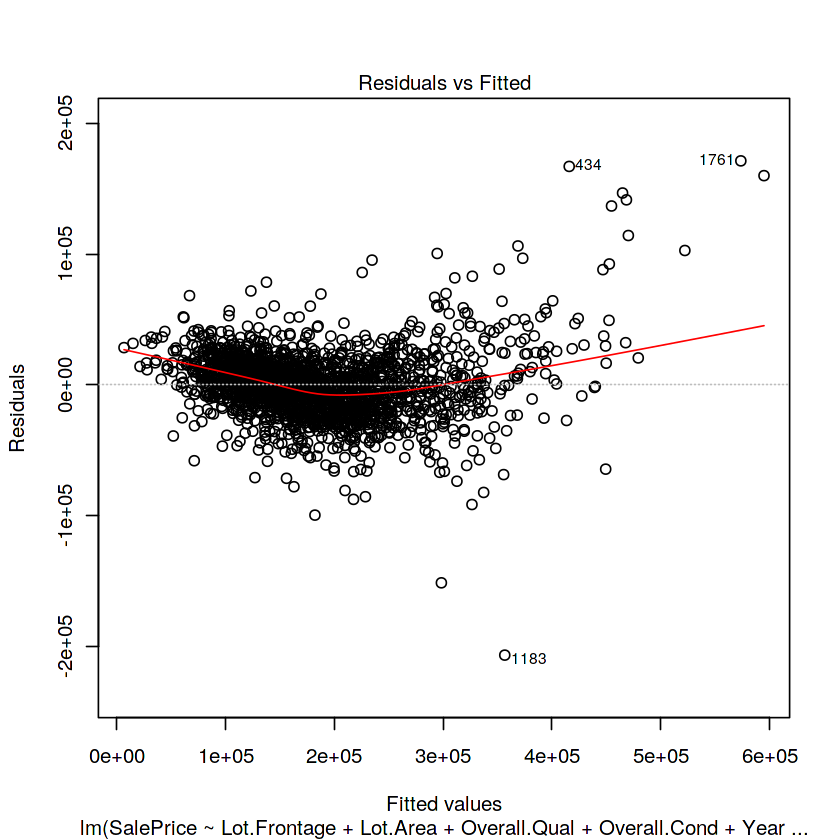

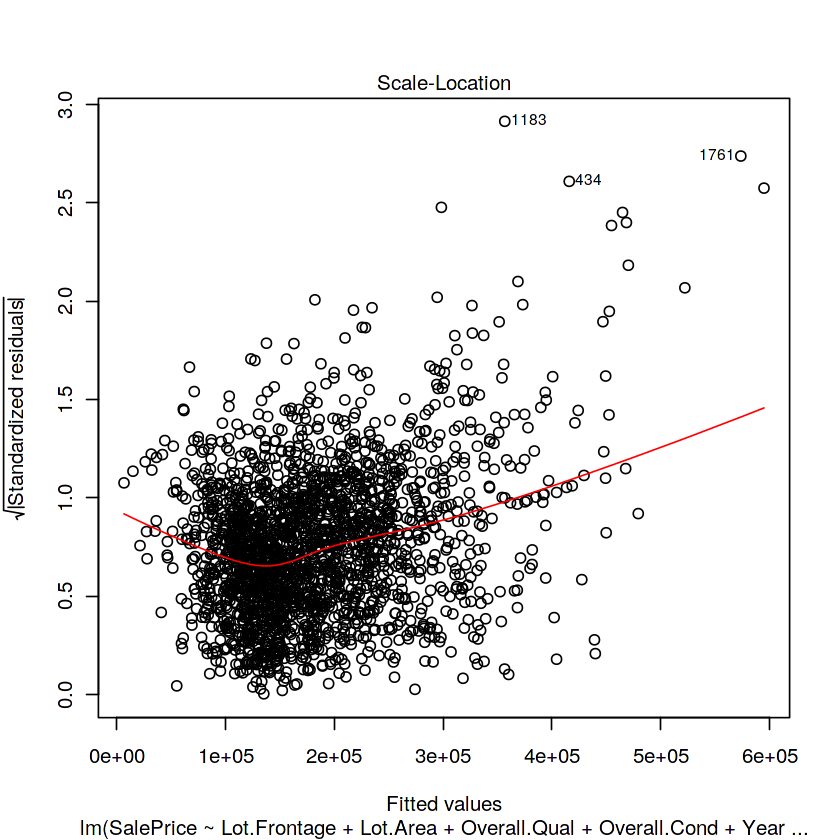

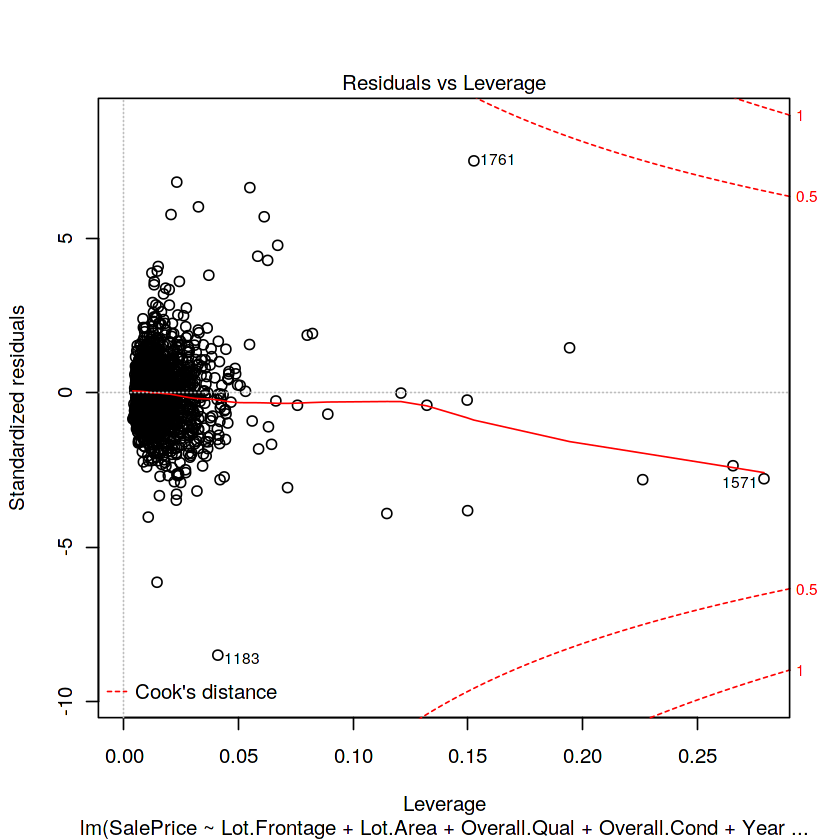

In [146]:
plot(model_back_sig)

In [147]:
library(MASS)


Attaching package: ‘MASS’

The following object is masked from ‘package:dplyr’:

    select



In [148]:
sqrt(vif(model_back_sig)) > 2

Lot.Frontage         Lot.Area     Overall.Qual     Overall.Cond 
           FALSE            FALSE            FALSE            FALSE 
      Year.Built     Mas.Vnr.Area     BsmtFin.SF.1     BsmtFin.SF.2 
           FALSE            FALSE             TRUE            FALSE 
     Bsmt.Unf.SF      X1st.Flr.SF      X2nd.Flr.SF    Bedroom.AbvGr 
            TRUE             TRUE             TRUE            FALSE 
   Kitchen.AbvGr    TotRms.AbvGrd    Garage.Yr.Blt      Garage.Area 
           FALSE             TRUE            FALSE            FALSE 
    Wood.Deck.SF     Screen.Porch        Pool.Area       Exter.Qual 
           FALSE            FALSE            FALSE            FALSE 
      Exter.Cond     Kitchen.Qual       Heating.QC        Bsmt.Qual 
           FALSE            FALSE            FALSE            FALSE 
   Bsmt.Exposure       Functional     GarageDetchd        Has2ndFlr 
           FALSE            FALSE            FALSE             TRUE 
       HasMasVnr    RecentRemodel HasOpen.Porch.SF       HighSeason 
           FALSE            FALSE            FALSE            FALSE

In [149]:
multi = dataset[,c('SalePrice','BsmtFin.SF.1','Bsmt.Unf.SF','X1st.Flr.SF','X2nd.Flr.SF','TotRms.AbvGrd','Has2ndFlr')]

In [150]:
cor(multi) 

SalePrice  BsmtFin.SF.1 Bsmt.Unf.SF  X1st.Flr.SF X2nd.Flr.SF 
SalePrice     1.00000000  0.45026175   0.183325894  0.6455888   0.269953843
BsmtFin.SF.1  0.45026175  1.00000000  -0.498791065  0.4183370  -0.177771367
Bsmt.Unf.SF   0.18332589 -0.49879107   1.000000000  0.3024583   0.002051652
X1st.Flr.SF   0.64558879  0.41833701   0.302458337  1.0000000  -0.266733778
X2nd.Flr.SF   0.26995384 -0.17777137   0.002051652 -0.2667338   1.000000000
TotRms.AbvGrd 0.50000526  0.01656217   0.251206813  0.3721618   0.588303509
Has2ndFlr     0.08963749 -0.24835488  -0.037498557 -0.4017489   0.906946553
              TotRms.AbvGrd Has2ndFlr  
SalePrice     0.50000526     0.08963749
BsmtFin.SF.1  0.01656217    -0.24835488
Bsmt.Unf.SF   0.25120681    -0.03749856
X1st.Flr.SF   0.37216177    -0.40174887
X2nd.Flr.SF   0.58830351     0.90694655
TotRms.AbvGrd 1.00000000     0.45129101
Has2ndFlr     0.45129101     1.00000000

In [151]:
model_sig_multi = lm(formula = SalePrice ~ Lot.Frontage + Lot.Area + Overall.Qual + 
    Overall.Cond + Year.Built + Mas.Vnr.Area + BsmtFin.SF.1 + 
    BsmtFin.SF.2 + X1st.Flr.SF + TotRms.AbvGrd +
    Bedroom.AbvGr + Kitchen.AbvGr  + Garage.Yr.Blt + 
    Garage.Area + Wood.Deck.SF + Screen.Porch + Pool.Area + Exter.Qual + 
    Exter.Cond + Kitchen.Qual + Heating.QC + Bsmt.Qual + Bsmt.Exposure + 
    Functional + GarageDetchd  + HasMasVnr + RecentRemodel + 
    HasOpen.Porch.SF + HighSeason, data = training_set)

In [152]:
sse5 = rmse(model_sig_multi)
sse5

[1] 29056.08

In [153]:
summary(model_sig_multi)


Call:
lm(formula = SalePrice ~ Lot.Frontage + Lot.Area + Overall.Qual + 
    Overall.Cond + Year.Built + Mas.Vnr.Area + BsmtFin.SF.1 + 
    BsmtFin.SF.2 + X1st.Flr.SF + TotRms.AbvGrd + Bedroom.AbvGr + 
    Kitchen.AbvGr + Garage.Yr.Blt + Garage.Area + Wood.Deck.SF + 
    Screen.Porch + Pool.Area + Exter.Qual + Exter.Cond + Kitchen.Qual + 
    Heating.QC + Bsmt.Qual + Bsmt.Exposure + Functional + GarageDetchd + 
    HasMasVnr + RecentRemodel + HasOpen.Porch.SF + HighSeason, 
    data = training_set)

Residuals:
    Min      1Q  Median      3Q     Max 
-199354  -15687    -596   14481  281224 

Coefficients:
                  Estimate Std. Error t value Pr(>|t|)    
(Intercept)      180989.67     609.65 296.874  < 2e-16 ***
Lot.Frontage       2031.75     747.04   2.720 0.006586 ** 
Lot.Area           4722.78     694.68   6.799 1.37e-11 ***
Overall.Qual      22820.69    1088.96  20.956  < 2e-16 ***
Overall.Cond       4561.66     719.18   6.343 2.74e-10 ***
Year.Built         4972.73    10

In [154]:
model_sig_multi2 = lm(formula = SalePrice ~ Lot.Frontage + Lot.Area + Overall.Qual + 
    Overall.Cond + Year.Built + Mas.Vnr.Area + BsmtFin.SF.1 + 
    BsmtFin.SF.2 + X1st.Flr.SF + TotRms.AbvGrd +
    Kitchen.AbvGr  + Garage.Yr.Blt + 
    Garage.Area + Wood.Deck.SF + Screen.Porch + Pool.Area + Exter.Qual + 
    Kitchen.Qual + Heating.QC + Bsmt.Qual + 
    HasMasVnr + RecentRemodel + HighSeason, data = training_set)

In [155]:
summary(model_sig_multi2)


Call:
lm(formula = SalePrice ~ Lot.Frontage + Lot.Area + Overall.Qual + 
    Overall.Cond + Year.Built + Mas.Vnr.Area + BsmtFin.SF.1 + 
    BsmtFin.SF.2 + X1st.Flr.SF + TotRms.AbvGrd + Kitchen.AbvGr + 
    Garage.Yr.Blt + Garage.Area + Wood.Deck.SF + Screen.Porch + 
    Pool.Area + Exter.Qual + Kitchen.Qual + Heating.QC + Bsmt.Qual + 
    HasMasVnr + RecentRemodel + HighSeason, data = training_set)

Residuals:
    Min      1Q  Median      3Q     Max 
-201424  -15371    -732   14976  284524 

Coefficients:
              Estimate Std. Error t value Pr(>|t|)    
(Intercept)   180989.7      613.3 295.101  < 2e-16 ***
Lot.Frontage    1969.5      733.4   2.686  0.00730 ** 
Lot.Area        4536.2      693.9   6.537 7.80e-11 ***
Overall.Qual   24180.5     1058.4  22.846  < 2e-16 ***
Overall.Cond    4723.2      708.1   6.670 3.25e-11 ***
Year.Built      5589.7      963.1   5.804 7.45e-09 ***
Mas.Vnr.Area   12528.1      923.0  13.573  < 2e-16 ***
BsmtFin.SF.1   12871.6      725.4  17.744  < 2e-

In [156]:
rmse(model_sig_multi2)

[1] 29235.99

In [157]:
AIC(model_sig_multi2,model_sig_multi)

df AIC     
model_sig_multi2 25 50810.40
model_sig_multi  31 50790.29

In [158]:
anova(model_sig_multi2,model_sig_multi)

Res.Df RSS          Df Sum of Sq   F        Pr(>F)      
1 2150   1.758178e+12 NA          NA       NA           NA
2 2144   1.732399e+12  6 25779267071 5.317363 1.863772e-05

In [159]:
y_pred = predict(model_sig_multi2, newdata = test_set)
ggplot() +
  geom_point(aes(x = test_set$SalePrice, y = y_pred),
             colour = 'red')+
  geom_abline(intercept = 0, slope = 1,colour = 'blue',lty =2) + 
  ggtitle("Sale Price Prediction (Linear Regression Model Final)") + xlab('test set sale price') + ylab('predicted sale price')

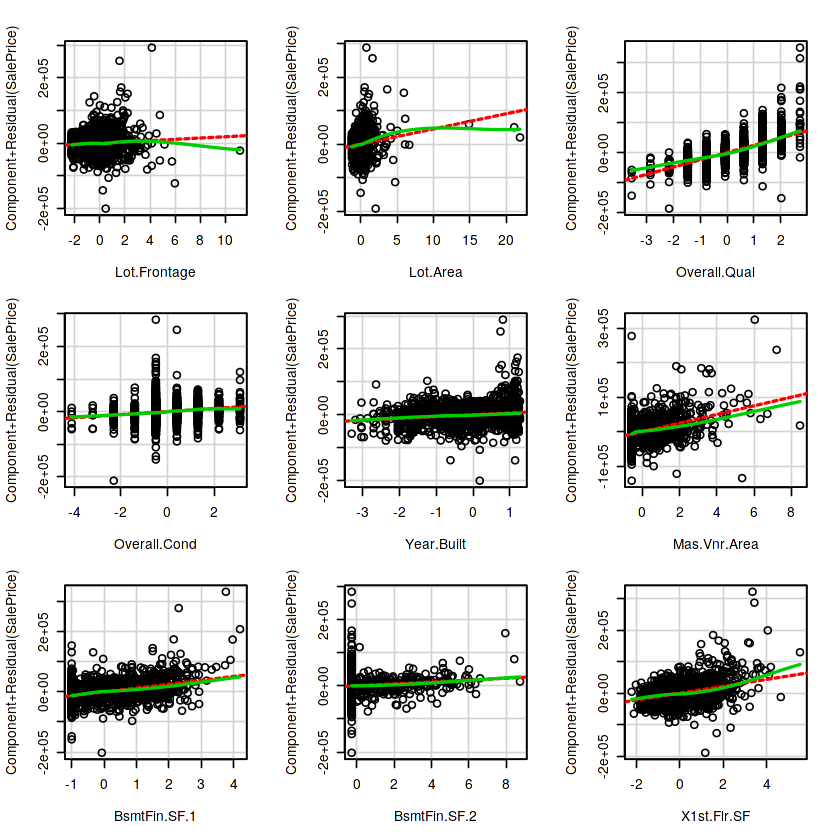

In [160]:
crPlots(model_sig_multi2)

In [161]:
par(mfrow=c(2,2))
plot(model_sig_multi2)

In [162]:
#try ridge, lasso and elastic before pca
library(glmnet)

Loading required package: Matrix
Loading required package: foreach
Loaded glmnet 2.0-13



In [163]:
#lasso model
glm.cv.lasso <- cv.glmnet(as.matrix(training_set[-37]), training_set$SalePrice, alpha = 1)
penalty.lasso <- glm.cv.lasso$lambda.min
glm.lasso <- glmnet(x = as.matrix(training_set[-37]), y = training_set$SalePrice, alpha = 1, lambda = penalty.lasso)


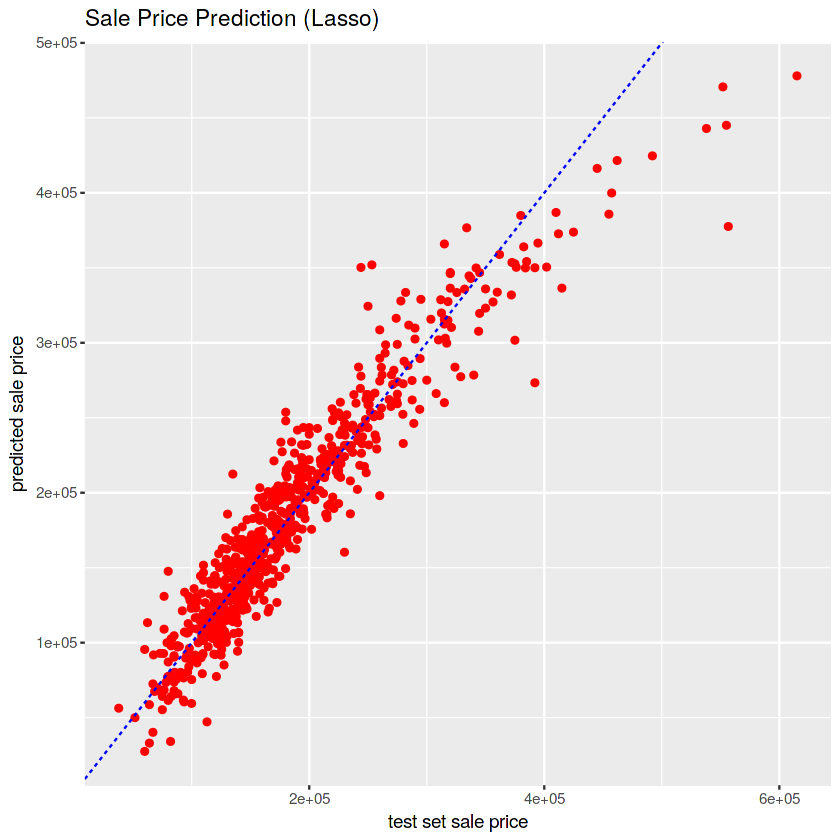

In [164]:
y_pred.lasso2 = as.numeric(predict(glm.lasso, as.matrix(test_set[-37])))
ggplot() +
  geom_point(aes(x = test_set$SalePrice, y = y_pred.lasso2),
             colour = 'red')+
  geom_abline(intercept = 0, slope = 1,colour = 'blue',lty =2) + 
  ggtitle("Sale Price Prediction (Lasso)") + xlab('test set sale price') + ylab('predicted sale price')

In [165]:
rmse2 = function(y){
    return (sqrt(((sum((test_set$SalePrice - y)))^2)/dim(test_set)[1]))
}

In [166]:
sse7 = rmse2(y_pred.lasso2)
sse7

[1] 20148.87

In [167]:
sse7

[1] 20148.87

In [168]:
glm.lasso


Call:  glmnet(x = as.matrix(training_set[-37]), y = training_set$SalePrice,      alpha = 1, lambda = penalty.lasso) 

     Df   %Dev Lambda
[1,] 63 0.9073  138.7

In [169]:
tmp_coeffs <- coef(glm.lasso, s = "lambda.min")
coef_lasso = data.frame(name = tmp_coeffs@Dimnames[[1]][tmp_coeffs@i + 1], coefficient = tmp_coeffs@x)

In [170]:
dim(coef_lasso)

[1] 64  2

In [171]:
ridge.sol <- lm.ridge(SalePrice ~ ., lambda = seq(0, 150, length = 151), data = training_set, model = TRUE)

In [172]:
names(ridge.sol) 

[1] "coef"   "scales" "Inter"  "lambda" "ym"     "xm"     "GCV"    "kHKB"  
[9] "kLW"

In [173]:
library(ridge)
ridge_mod <- linearRidge(SalePrice ~ ., data = training_set)
summary(ridge_mod)


Call:
linearRidge(formula = SalePrice ~ ., data = training_set)


Coefficients:
                    Estimate Scaled estimate Std. Error (scaled)
(Intercept)        180989.67              NA                  NA
MS.SubClass           552.60        25759.92            37726.65
Lot.Frontage         2422.98       112948.48            30497.53
Lot.Area             -124.52        -5804.66            16816.71
Overall.Qual        13479.41       628348.65            46269.38
Overall.Cond         6174.39       287821.94            31594.27
Year.Built           6813.56       317617.00            58861.20
Year.Remod.Add        451.47        21045.38            40513.43
Mas.Vnr.Area         8520.18       397172.10            37301.18
BsmtFin.SF.1        10226.51       476713.46            29008.95
BsmtFin.SF.2         1729.24        80609.37            30647.24
Bsmt.Unf.SF          -309.25       -14415.74            27018.04
Total.Bsmt.SF       11046.45       514935.21            36885.19
X1st.Flr.

In [174]:
#remove those features with p <0.05
ridge.sol.3 = linearRidge(SalePrice ~ Lot.Frontage + Lot.Area + Overall.Qual + Overall.Cond + 
    Year.Built + Mas.Vnr.Area + BsmtFin.SF.2 + Bedroom.AbvGr + 
    Garage.Yr.Blt + Garage.Area + Wood.Deck.SF + 
    Screen.Porch + Pool.Area + Exter.Qual + Kitchen.Qual + Heating.QC + 
    Bsmt.Qual + GarageDetchd + HasMasVnr + RecentRemodel + HasOpen.Porch.SF, data = training_set)

In [175]:
summary(ridge.sol.3)


Call:
linearRidge(formula = SalePrice ~ Lot.Frontage + Lot.Area + Overall.Qual + 
    Overall.Cond + Year.Built + Mas.Vnr.Area + BsmtFin.SF.2 + 
    Bedroom.AbvGr + Garage.Yr.Blt + Garage.Area + Wood.Deck.SF + 
    Screen.Porch + Pool.Area + Exter.Qual + Kitchen.Qual + Heating.QC + 
    Bsmt.Qual + GarageDetchd + HasMasVnr + RecentRemodel + HasOpen.Porch.SF, 
    data = training_set)


Coefficients:
                 Estimate Scaled estimate Std. Error (scaled) t value (scaled)
(Intercept)        180990              NA                  NA               NA
Lot.Frontage         5725          266863               40193            6.640
Lot.Area             7631          355735               37673            9.443
Overall.Qual        30947         1442590               55019           26.220
Overall.Cond         3878          180759               38376            4.710
Year.Built           2828          131853               54968            2.399
Mas.Vnr.Area        15837          738258  

In [176]:
rmse(ridge.sol.3)

[1] 35040.56

Lot.Frontage + Lot.Area + Overall.Qual + Overall.Cond + 
    Year.Built + Mas.Vnr.Area + BsmtFin.SF.2 + Bedroom.AbvGr + 
    Garage.Yr.Blt + Garage.Area + Wood.Deck.SF + 
    Screen.Porch + Pool.Area + Exter.Qual + Kitchen.Qual + Heating.QC + 
    Bsmt.Qual + GarageDetchd + HasMasVnr + RecentRemodel + HasOpen.Porch.SF

In [177]:
ridge.2 <- lm.ridge(SalePrice ~ Lot.Frontage + Lot.Area + Overall.Qual + Overall.Cond + 
    Year.Built + Mas.Vnr.Area + BsmtFin.SF.2 + Bedroom.AbvGr + 
    Garage.Yr.Blt + Garage.Area + Wood.Deck.SF + 
    Screen.Porch + Pool.Area + Exter.Qual + Kitchen.Qual + Heating.QC + 
    Bsmt.Qual + GarageDetchd + HasMasVnr + RecentRemodel + HasOpen.Porch.SF, lambda = seq(0, 150, length = 151), data = training_set, model = TRUE)

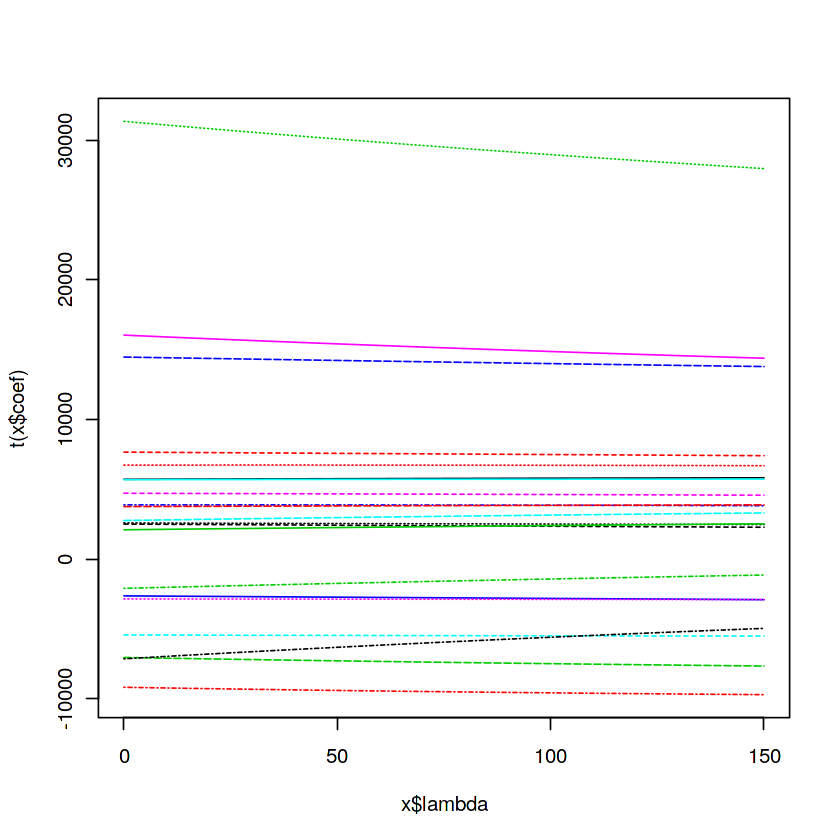

In [178]:
plot(ridge.2)

'Lot.Frontage','Lot.Area','Overall.Qual','Year.Built','Mas.Vnr.Area','BsmtFin.SF.2','Bedroom.AbvGr','Garage.Yr.Blt','Garage.Area','Wood.Deck.SF','Screen.Porch','Pool.Area',' Exter.Qual','Kitchen.Qual','Heating.QC','Bsmt.Qual','GarageDetchd','HasMasVnr','RecentRemodel','HasOpen.Porch.SF','SalePrice']

In [179]:
train2 = training_set[,c('Lot.Frontage','Lot.Area','Overall.Qual','Year.Built','Mas.Vnr.Area','BsmtFin.SF.2','Bedroom.AbvGr','Garage.Yr.Blt','Garage.Area','Wood.Deck.SF','Screen.Porch','Pool.Area','Exter.Qual','Kitchen.Qual','Heating.QC','Bsmt.Qual','GarageDetchd','HasMasVnr','RecentRemodel','HasOpen.Porch.SF','SalePrice')]

In [180]:
dim(train2)

[1] 2174   21

In [181]:
head(training_set)

MS.SubClass Lot.Frontage Lot.Area    Overall.Qual Overall.Cond Year.Built
1  0.7606104    3.2694301    3.07769130 -0.07212328  -0.4948409   -0.3845857
3  0.7606104    0.5183837    0.59650881 -0.07212328   0.4069061   -0.4509131
6  0.7606104    0.3808314   -0.01148934 -0.07212328   0.4069061    0.8756339
7  0.7606104   -1.3156472   -0.72849905  1.32784104  -0.4948409    0.9751249
9  0.7606104   -1.4073488   -0.66201476  1.32784104  -0.4948409    0.7761429
10 0.7606104   -0.4444825   -0.36276456  0.62785888  -0.4948409    0.9087975
   Year.Remod.Add Mas.Vnr.Area BsmtFin.SF.1 BsmtFin.SF.2 ⋯ HasWood.Deck.SF
1  -1.1617275      0.06473322   0.4505707   -0.2808577   ⋯  1.060474      
3  -1.2571139      0.04216134   1.0951098   -0.2808577   ⋯  1.060474      
6   0.6506156     -0.45441998   0.3665990   -0.2808577   ⋯  1.060474      
7   0.7936954     -0.56727937   0.3983721   -0.2808577   ⋯ -0.942541      
9   0.5552292     -0.56727937   1.6783723   -0.2808577   ⋯  1.060474      
10  0.6983089     -0.56727937  -0.9996424   -0.2808577   ⋯  1.060474      
   HasOpen.Porch.SF HasEnclosed.Porch HasX3Ssn.Porch HasScreen.Porch HighSeason
1   0.8766779       -0.4297164        -0.116248      -0.2985588       1.0893010
3   0.8766779       -0.4297164        -0.116248      -0.2985588       1.0893010
6   0.8766779       -0.4297164        -0.116248      -0.2985588       1.0893010
7  -1.1401451        2.3260459        -0.116248      -0.2985588      -0.9175976
9   0.8766779       -0.4297164        -0.116248      -0.2985588      -0.9175976
10  0.8766779       -0.4297164        -0.116248      -0.2985588       1.0893010
   NeighborhoodBin PartialPlan HeatingScale TimeSinceSold
1  -0.1045785      -0.3040062  -0.2995725   -1.678687    
3  -0.1045785      -0.3040062   1.4248863   -1.678687    
6  -0.1045785      -0.3040062  -0.8743921   -1.678687    
7   1.7215553      -0.3040062  -0.8743921   -1.678687    
9   1.7215553      -0.3040062  -0.8743921   -1.678687    
10 -0.1045785      -0.3040062   0.2752471   -1.678687

In [182]:
test2 = training_set[,c('Lot.Frontage','Lot.Area','Overall.Qual','Year.Built','Mas.Vnr.Area','BsmtFin.SF.2','Bedroom.AbvGr','Garage.Yr.Blt','Garage.Area','Wood.Deck.SF','Screen.Porch','Pool.Area','Exter.Qual','Kitchen.Qual','Heating.QC','Bsmt.Qual','GarageDetchd','HasMasVnr','RecentRemodel','HasOpen.Porch.SF','SalePrice')]

In [183]:
#PCA
library(e1071)
library(caret)


In [184]:
pca = preProcess(x = train2[-21], method = 'pca', pcaComp = 10)
train2 = predict(pca, train2)
test2 = predict(pca, test2)

In [185]:
head(train2)

SalePrice PC1         PC2        PC3        PC4        PC5       
1  215000    -0.74139141 -3.7063269 -1.3572952  0.2827724 -0.6217608
3  172000    -0.05699524 -1.5413980 -0.5893886 -0.2794996  1.2861312
6  195500    -1.07184474 -0.6176083 -0.3759571  0.2019791  1.1622395
7  213500    -0.85769192  2.0963773  0.5721587  0.7088914  0.2333064
9  236500    -1.58467302  1.9111430  0.2617025  1.2844864  1.0412078
10 189000    -0.08171959  0.4533756 -0.2044649  0.6141035  0.3486434
   PC6         PC7         PC8         PC9       PC10       
1  -0.26171809 -1.00804389  0.98118381 0.3767289 -0.03326056
3  -0.78011984 -0.20868630  0.10815609 0.5742949 -0.79302982
6  -0.73758449 -0.66249995 -0.90453342 0.6460530 -0.55607840
7   0.23456199  0.02225191  0.00676078 0.3254105 -0.16919250
9  -0.06955004 -0.28512965 -0.72456100 0.7529746 -0.82009990
10 -0.30564254 -0.77188951 -1.14530712 0.7176292  0.19719819

In [186]:
model1 = lm(SalePrice ~., data = train2)

In [187]:
rmse3 = function(model){
    return (sqrt((sum((test2$SalePrice - predict(model, newdata = test2))^2))/dim(test2)[1]))
}

In [188]:
rmse3(model1)

[1] 38338.34

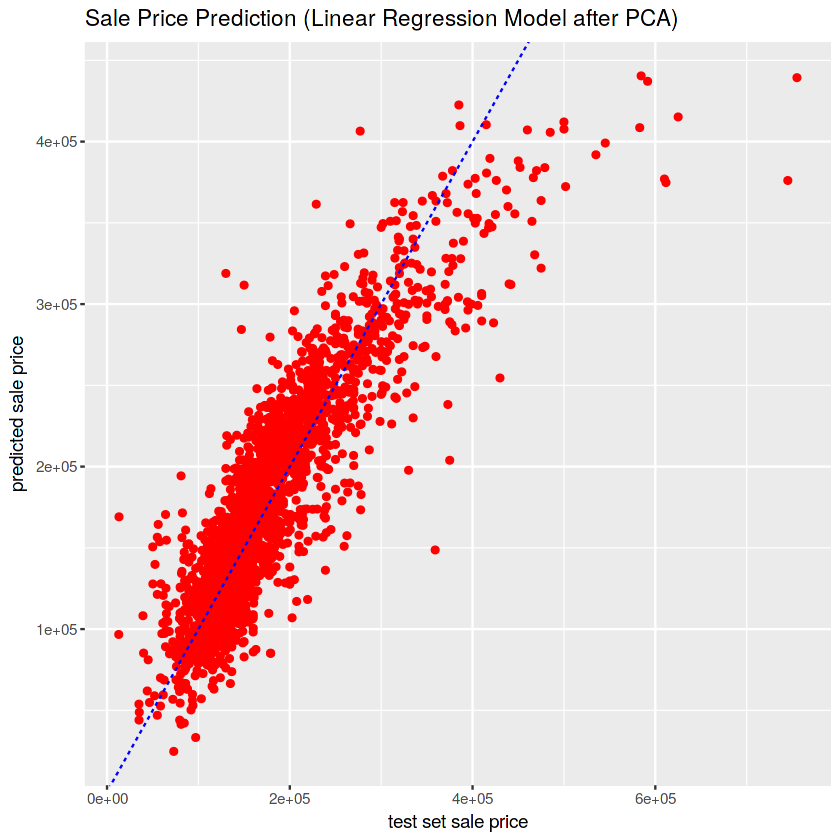

In [189]:
y_pred = predict(model1, newdata = test2)
ggplot() +
  geom_point(aes(x = test2$SalePrice, y = y_pred),
             colour = 'red')+
  geom_abline(intercept = 0, slope = 1,colour = 'blue',lty =2) + 
  ggtitle("Sale Price Prediction (Linear Regression Model after PCA)") + xlab('test set sale price') + ylab('predicted sale price')

In [190]:
gvlma(model1)


Call:
lm(formula = SalePrice ~ ., data = train2)

Coefficients:
(Intercept)          PC1          PC2          PC3          PC4          PC5  
   180989.7     -29646.0      -9168.5       -457.2       2691.0      -5528.1  
        PC6          PC7          PC8          PC9         PC10  
     2883.3       3463.3      -3450.6      -7085.6      -7710.5  


ASSESSMENT OF THE LINEAR MODEL ASSUMPTIONS
USING THE GLOBAL TEST ON 4 DEGREES-OF-FREEDOM:
Level of Significance =  0.05 

Call:
 gvlma(x = model1) 

                      Value p-value                   Decision
Global Stat        9220.226 0.00000 Assumptions NOT satisfied!
Skewness            669.992 0.00000 Assumptions NOT satisfied!
Kurtosis           8114.361 0.00000 Assumptions NOT satisfied!
Link Function       431.939 0.00000 Assumptions NOT satisfied!
Heteroscedasticity    3.934 0.04732 Assumptions NOT satisfied!

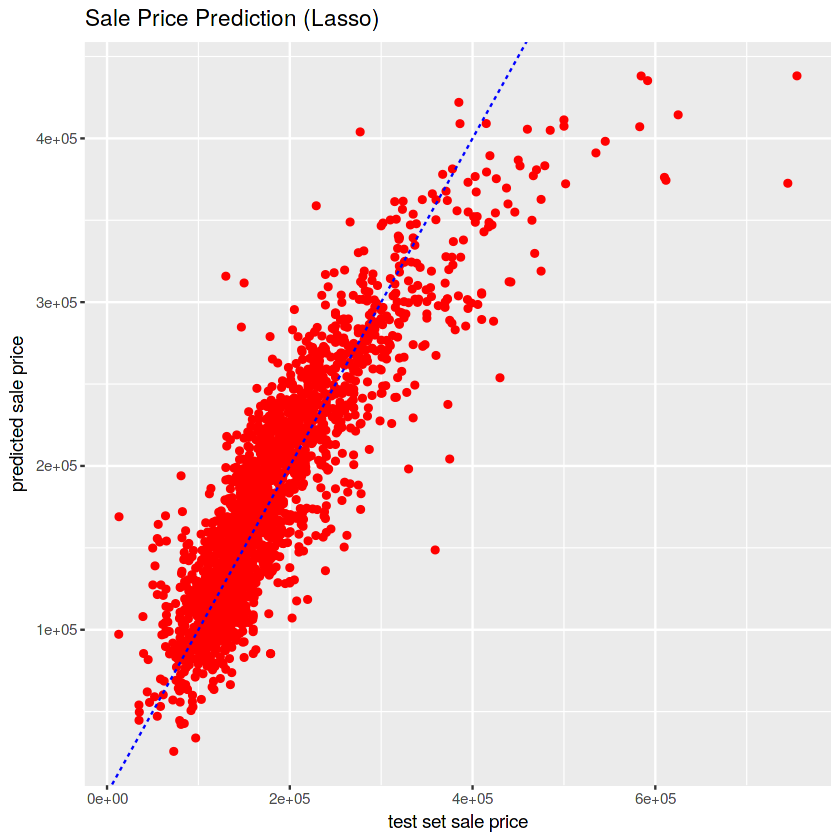

In [191]:
glm.cv.lasso <- cv.glmnet(as.matrix(train2[-1]), train2$SalePrice, alpha = 1)
penalty.lasso <- glm.cv.lasso$lambda.min
glm.lasso <- glmnet(x = as.matrix(train2[-1]), y = train2$SalePrice, alpha = 1, lambda = penalty.lasso)
y_pred.lasso2 = as.numeric(predict(glm.lasso, as.matrix(test2[-1])))
ggplot() +
  geom_point(aes(x = test2$SalePrice, y = y_pred.lasso2),
             colour = 'red')+
  geom_abline(intercept = 0, slope = 1,colour = 'blue',lty =2) + 
  ggtitle("Sale Price Prediction (Lasso)") + xlab('test set sale price') + ylab('predicted sale price')

In [192]:
sqrt(sum((y_pred.lasso2 - test2$SalePrice)^2)/dim(test2)[1])

[1] 38341.72

正式pca
===

In [193]:
pca = preProcess(x = training_set[-37], method = 'pca', pcaComp = 10)
training_set = predict(pca, training_set)
test_set = predict(pca, test_set)

In [194]:
head(training_set)

SalePrice PC1        PC2       PC3        PC4        PC5        PC6       
1  215000    -2.2276771 -2.032311 -2.4443694  3.7781998  0.2780352  0.7659645
3  172000     0.0810728 -2.610509 -2.2328998  0.6069513 -1.9342726  2.7693236
6  195500    -2.4845828  1.320246 -0.9373101 -0.8459851 -3.0191129  1.4144120
7  213500    -0.3579505 -1.621619  1.6162315 -1.1316207  0.3944882 -0.2385950
9  236500    -2.8043513 -2.160850  0.9742658 -0.4833972 -1.8003693 -0.1023939
10 189000    -1.0681430  2.433537  0.1356906 -1.6773262 -1.8197644  1.1767462
   PC7       PC8         PC9       PC10      
1  0.6013538  0.80920603 1.4244028 0.70606402
3  1.7637173  2.10509362 0.5776536 0.60823276
6  1.3090710  0.09692818 0.5280276 0.03501479
7  1.0103373 -1.28698219 3.5179808 0.49183936
9  2.5809596 -0.45228175 2.2013810 1.09352048
10 1.0988232  1.07049965 1.1891940 1.02448975

In [195]:
model1 = lm(SalePrice ~., data = training_set)

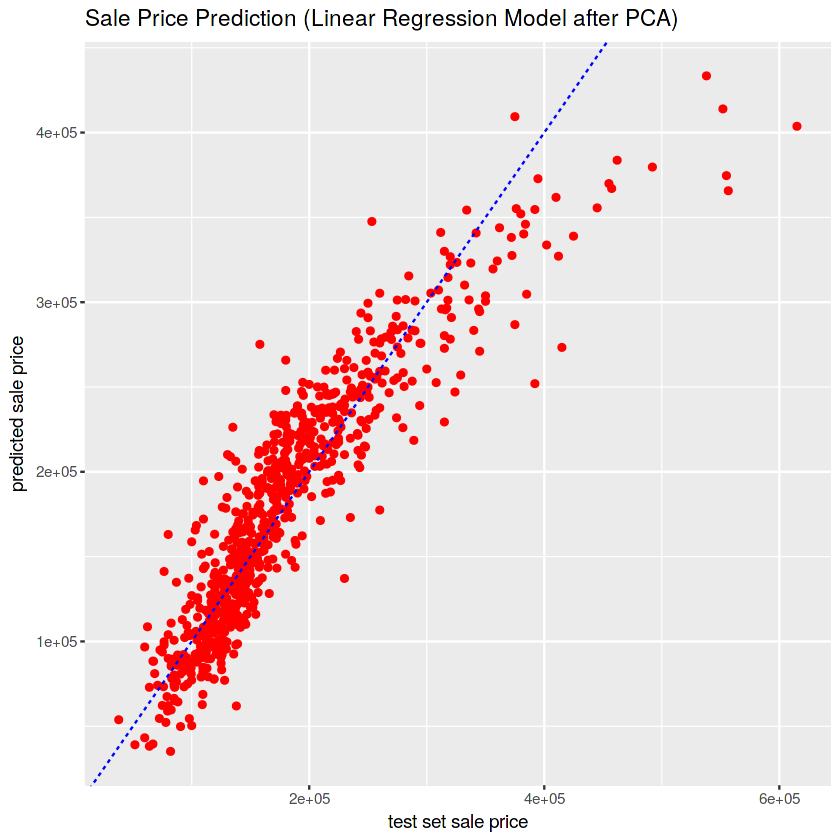

In [196]:
y_pred = predict(model1, newdata = test_set)
ggplot() +
  geom_point(aes(x = test_set$SalePrice, y = y_pred),
             colour = 'red')+
  geom_abline(intercept = 0, slope = 1,colour = 'blue',lty =2) + 
  ggtitle("Sale Price Prediction (Linear Regression Model after PCA)") + xlab('test set sale price') + ylab('predicted sale price')

In [197]:
summary(model1)


Call:
lm(formula = SalePrice ~ ., data = training_set)

Residuals:
    Min      1Q  Median      3Q     Max 
-167758  -19015   -1465   16596  342316 

Coefficients:
            Estimate Std. Error t value Pr(>|t|)    
(Intercept) 180989.7      721.5 250.840  < 2e-16 ***
PC1         -20498.8      210.1 -97.578  < 2e-16 ***
PC2           3350.3      313.9  10.673  < 2e-16 ***
PC3          -2615.0      362.5  -7.213 7.53e-13 ***
PC4           5593.0      380.5  14.697  < 2e-16 ***
PC5           2670.8      417.5   6.398 1.93e-10 ***
PC6          -2749.3      454.3  -6.052 1.68e-09 ***
PC7           3822.4      460.5   8.300  < 2e-16 ***
PC8          -4842.6      476.8 -10.156  < 2e-16 ***
PC9            978.9      492.8   1.986   0.0471 *  
PC10          -532.1      508.5  -1.047   0.2954    
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

Residual standard error: 33640 on 2163 degrees of freedom
Multiple R-squared:  0.8244,	Adjusted R-squared:  0.8236 
F-statistic:  1

In [198]:
gvlma(model1)


Call:
lm(formula = SalePrice ~ ., data = training_set)

Coefficients:
(Intercept)          PC1          PC2          PC3          PC4          PC5  
   180989.7     -20498.8       3350.3      -2615.0       5593.0       2670.8  
        PC6          PC7          PC8          PC9         PC10  
    -2749.3       3822.4      -4842.6        978.9       -532.1  


ASSESSMENT OF THE LINEAR MODEL ASSUMPTIONS
USING THE GLOBAL TEST ON 4 DEGREES-OF-FREEDOM:
Level of Significance =  0.05 

Call:
 gvlma(x = model1) 

                       Value p-value                   Decision
Global Stat        15665.534  0.0000 Assumptions NOT satisfied!
Skewness             807.897  0.0000 Assumptions NOT satisfied!
Kurtosis           14176.695  0.0000 Assumptions NOT satisfied!
Link Function        678.516  0.0000 Assumptions NOT satisfied!
Heteroscedasticity     2.426  0.1193    Assumptions acceptable.

In [199]:
library(glmnet)

In [200]:
#lasso model
glm.cv.lasso <- cv.glmnet(as.matrix(training_set[-37]), training_set$SalePrice, alpha = 1)
penalty.lasso <- glm.cv.lasso$lambda.min
glm.lasso <- glmnet(x = as.matrix(training_set[-37]), y = training_set$SalePrice, alpha = 1, lambda = penalty.lasso)
y_pred.lasso <- as.numeric(predict(glm.lasso, as.matrix(training_set[-37])))

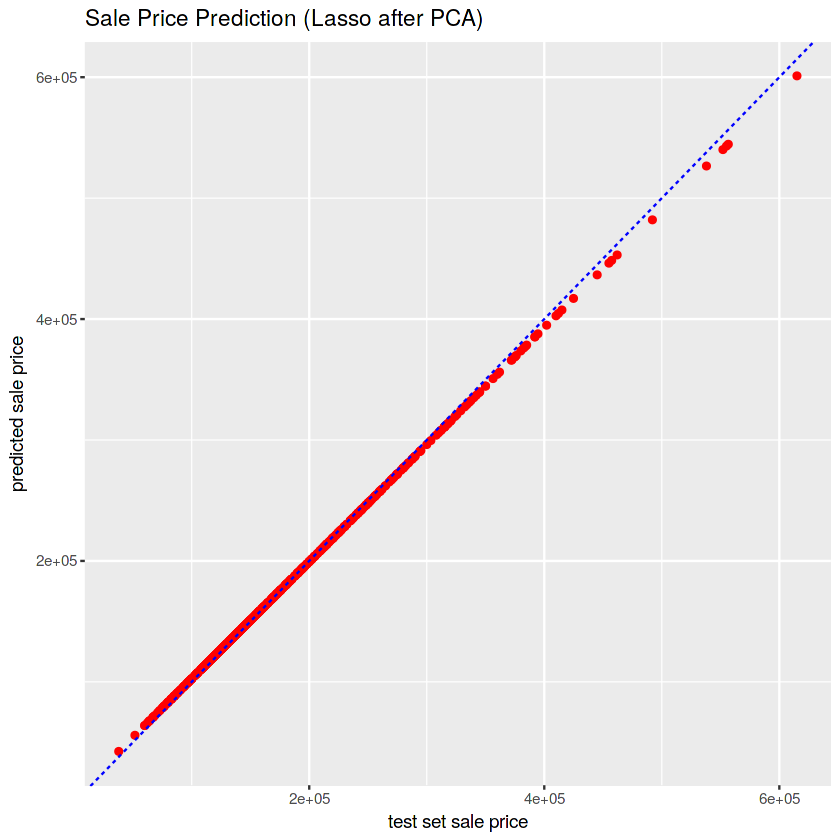

In [201]:
y_pred.lasso2 = as.numeric(predict(glm.lasso, as.matrix(test_set[-37])))
ggplot() +
  geom_point(aes(x = test_set$SalePrice, y = y_pred.lasso2),
             colour = 'red')+
  geom_abline(intercept = 0, slope = 1,colour = 'blue',lty =2) + 
  ggtitle("Sale Price Prediction (Lasso after PCA)") + xlab('test set sale price') + ylab('predicted sale price')

In [202]:
rmse2(y_pred.lasso2)

[1] 644.6161

In [204]:
#ridge model
glm.cv.ridge <- cv.glmnet(as.matrix(training_set[-37]), training_set$SalePrice, alpha = 0)
penalty.ridge <- glm.cv.ridge$lambda.min
glm.ridge <- glmnet(x = as.matrix(training_set[-37]), y = training_set$SalePrice, alpha = 0, lambda = penalty.ridge )
y_pred.ridge <- as.numeric(predict(glm.ridge, as.matrix(training_set[-37])))


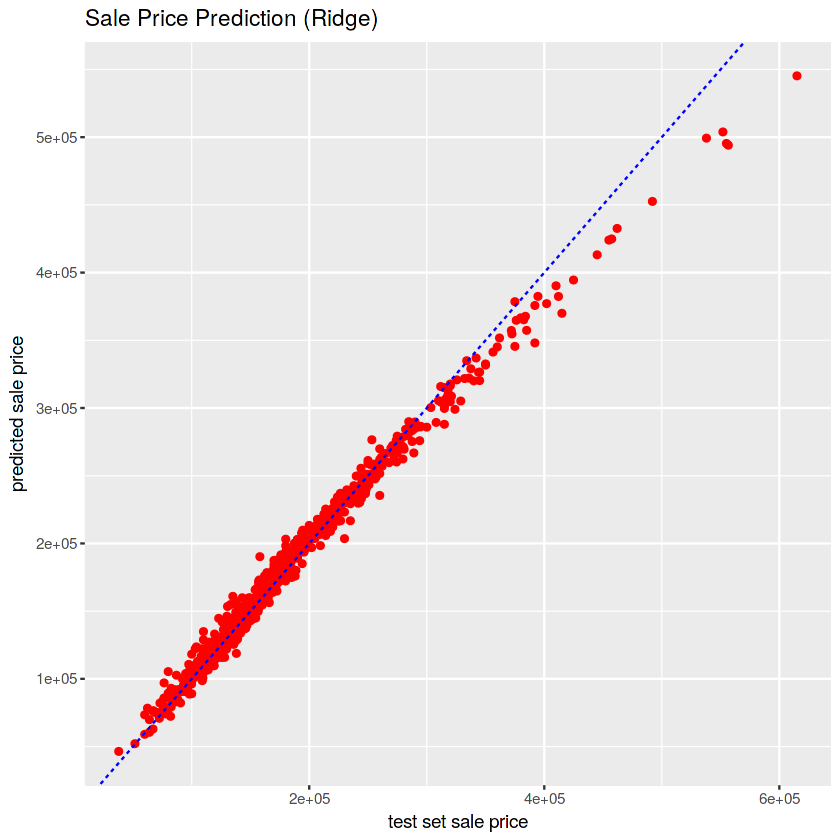

In [205]:
y_pred.ridge2 = as.numeric(predict(glm.ridge, as.matrix(test_set[-37])))
ggplot() +
  geom_point(aes(x = test_set$SalePrice, y = y_pred.ridge2),
             colour = 'red')+
  geom_abline(intercept = 0, slope = 1,colour = 'blue',lty =2) + 
  ggtitle("Sale Price Prediction (Ridge)") + xlab('test set sale price') + ylab('predicted sale price')

In [206]:
rmse2(y_pred.ridge2)

[1] 6021.528

In [207]:
#elastic net model
glm.cv.net <- cv.glmnet(data.matrix(training_set[-37]), training_set$SalePrice, alpha = 0.001)
penalty.net <- glm.cv.net$lambda.min
glm.net <- glmnet(x = as.matrix(training_set[-37]), y = training_set$SalePrice, alpha = 0.001, lambda = penalty.net)
y_pred.net <- as.numeric(predict(glm.net, as.matrix(training_set[-37])))

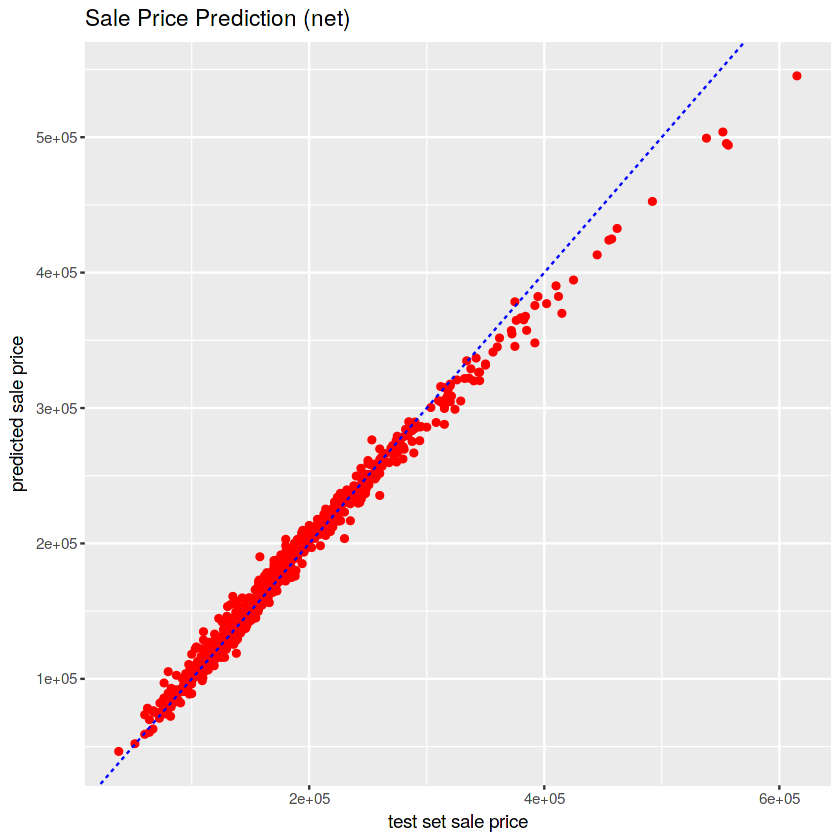

In [208]:
y_pred.net2 = as.numeric(predict(glm.net, as.matrix(test_set[-37])))
ggplot() +
  geom_point(aes(x = test_set$SalePrice, y = y_pred.net2),
             colour = 'red')+
  geom_abline(intercept = 0, slope = 1,colour = 'blue',lty =2) + 
  ggtitle("Sale Price Prediction (net)") + xlab('test set sale price') + ylab('predicted sale price')

In [209]:
rmse2(y_pred.net2)

[1] 6016.492